#keras pre trained version

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mendefinisikan ukuran target gambar dan batch size
image_size = (224, 224)
batch_size = 32

# Membuat ImageDataGenerator dengan normalisasi pixel
datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi pixel ke rentang 0-1

# Memuat gambar dari folder dengan resize otomatis
generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/TA_Dataset/Balanced',
    target_size=image_size,       # Resize gambar menjadi 224x224 piksel
    batch_size=batch_size,
    class_mode='categorical'      # Untuk klasifikasi multi-kelas
)

Found 12000 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# === Konfigurasi ===
image_size = (224, 224)
batch_size = 32
directory = '/content/drive/MyDrive/TA_Dataset/Balanced'

# === Langkah 1: Periksa apakah folder ada dan valid ===
if not os.path.exists(directory):
    raise FileNotFoundError(f"Folder tidak ditemukan: {directory}")

# Tampilkan daftar kategori (subfolder) di dalam folder utama
print("📂 Kategori yang ditemukan dalam folder:")
categories = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
if not categories:
    raise ValueError("Tidak ada subfolder ditemukan. Pastikan folder terdiri dari subfolder kelas.")

for i, cat in enumerate(categories):
    print(f"  {i+1}. {cat}")

# === Langkah 2: Hitung jumlah gambar per kategori ===
print("\n📊 Jumlah gambar per kategori:")
total_images = 0
for cat in categories:
    cat_path = os.path.join(directory, cat)
    image_count = len([f for f in os.listdir(cat_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])
    print(f"  {cat}: {image_count} gambar")
    total_images += image_count

print(f"\n✅ Total gambar yang ditemukan: {total_images}")

# === Langkah 3: Buat generator ImageDataGenerator ===
datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi pixel ke [0, 1]

generator = datagen.flow_from_directory(
    directory=directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,  # Mengacak gambar untuk pelatihan
    seed=42        # Untuk reproducibility
)

# === Tambahan: Tampilkan informasi dari generator ===
print(f"\n🔍 Info Generator:")
print(f"  - Jumlah kelas: {generator.num_classes}")
print(f"  - Jumlah batch per epoch: {generator.__len__()}")
print(f"  - Nama kelas: {list(generator.class_indices.keys())}")
print(f"  - Mapping kelas: {generator.class_indices}")

📂 Kategori yang ditemukan dalam folder:
  1. NORMAL
  2. DRUSEN
  3. DME
  4. CNV

📊 Jumlah gambar per kategori:
  NORMAL: 3000 gambar
  DRUSEN: 3000 gambar
  DME: 3000 gambar
  CNV: 3000 gambar

✅ Total gambar yang ditemukan: 12000
Found 12000 images belonging to 4 classes.

🔍 Info Generator:
  - Jumlah kelas: 4
  - Jumlah batch per epoch: 375
  - Nama kelas: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
  - Mapping kelas: {'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}


📦 Total kelas: 4
🔍 Kategori: ['NORMAL', 'DRUSEN', 'DME', 'CNV']

📊 Jumlah gambar per kelas:
  NORMAL: 3000 gambar
  DRUSEN: 3000 gambar
  DME: 3000 gambar
  CNV: 3000 gambar

✅ Total gambar: 12000


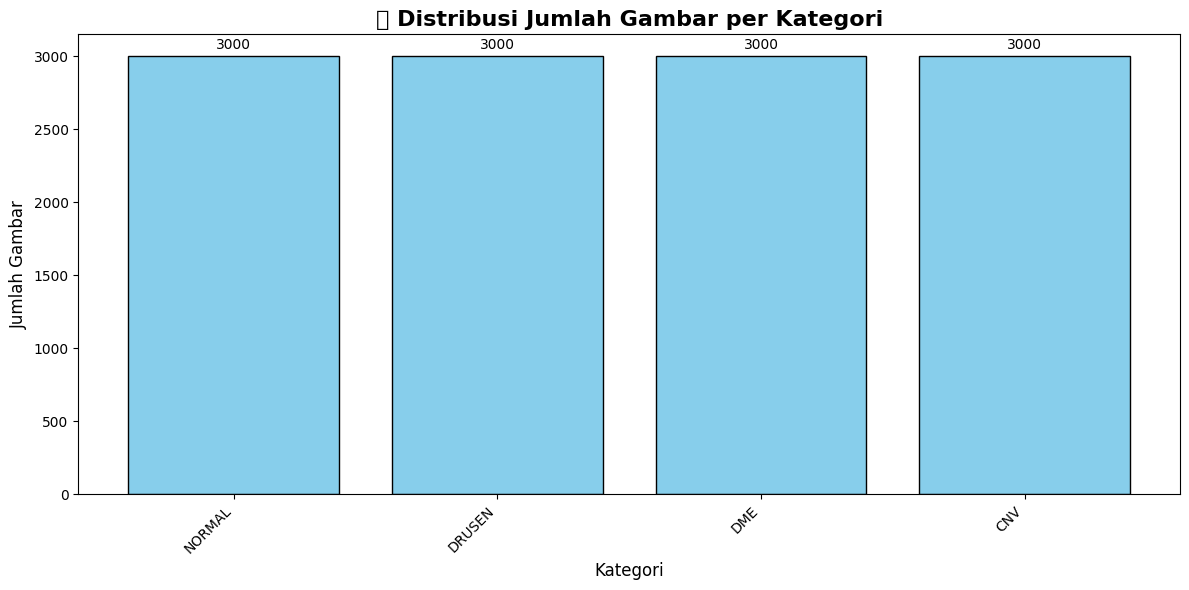

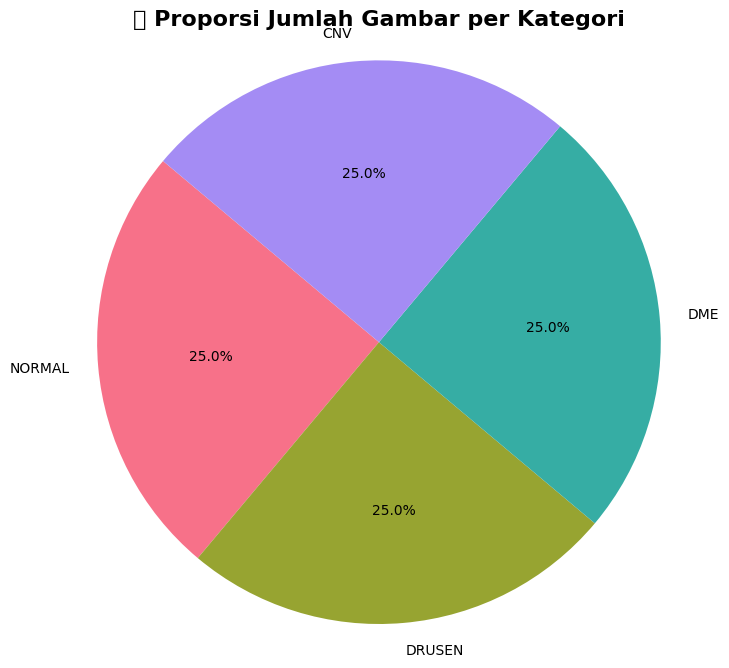


📈 Statistik Distribusi Klasifikasi:
  - Kategori terbanyak: NORMAL (3000 gambar)
  - Kategori paling sedikit: NORMAL (3000 gambar)
  - Rata-rata gambar per kelas: 3000.00
  - Deviasi standar: 0.00
  - Rasio kelas terbesar : terkecil = 1.00:1

🖼️ Contoh Gambar dari Setiap Kategori:
Found 12000 images belonging to 4 classes.


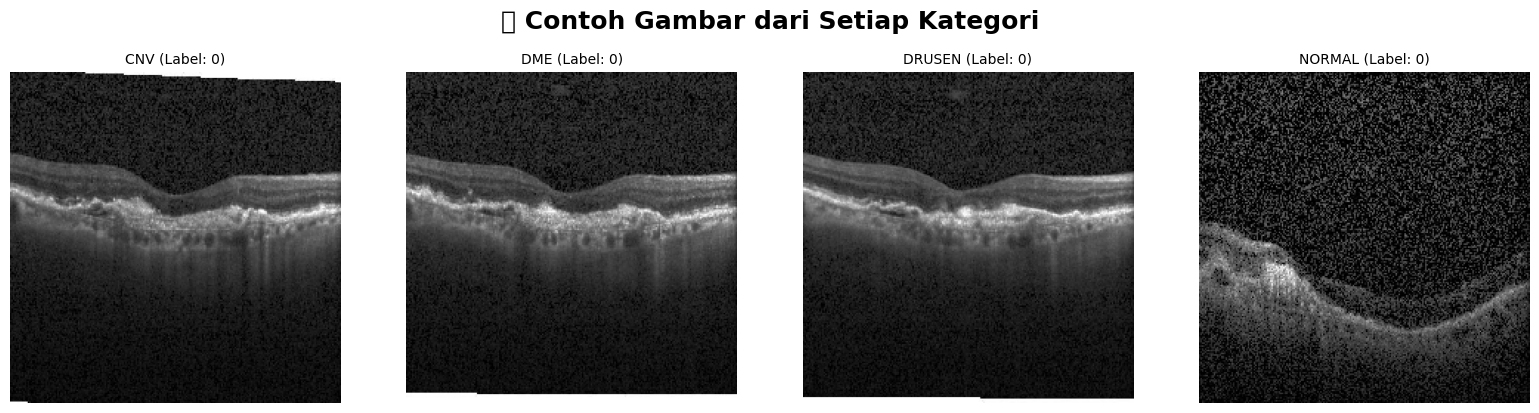

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# === Konfigurasi ===
image_size = (224, 224)
batch_size = 32
directory = '/content/drive/MyDrive/TA_Dataset/Balanced'

# === 1. Validasi folder dan ambil daftar kategori ===
if not os.path.exists(directory):
    raise FileNotFoundError(f"Folder tidak ditemukan: {directory}")

categories = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
if not categories:
    raise ValueError("Tidak ada subfolder kelas ditemukan.")

print(f"📦 Total kelas: {len(categories)}")
print(f"🔍 Kategori: {categories}")

# === 2. Hitung jumlah gambar per kelas ===
class_counts = []
class_names = []

print("\n📊 Jumlah gambar per kelas:")
for cat in categories:
    cat_path = os.path.join(directory, cat)
    img_count = len([f for f in os.listdir(cat_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])
    class_counts.append(img_count)
    class_names.append(cat)
    print(f"  {cat}: {img_count} gambar")

total_images = sum(class_counts)
print(f"\n✅ Total gambar: {total_images}")

# === 3. Visualisasi Distribusi Kategori (Bar Plot) ===
plt.figure(figsize=(12, 6))
bars = plt.bar(class_names, class_counts, color='skyblue', edgecolor='black')
plt.title("📈 Distribusi Jumlah Gambar per Kategori", fontsize=16, fontweight='bold')
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Tambahkan angka di atas setiap batang
for bar, count in zip(bars, class_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(class_counts)*0.01,
             f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# === 4. Visualisasi Pie Chart (Proporsi Kategori) ===
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(class_names)))
plt.title("🥧 Proporsi Jumlah Gambar per Kategori", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

# === 5. Analisis Statistik Distribusi Klasifikasi ===
print("\n📈 Statistik Distribusi Klasifikasi:")
print(f"  - Kategori terbanyak: {max(class_names, key=lambda x: class_counts[class_names.index(x)])} ({max(class_counts)} gambar)")
print(f"  - Kategori paling sedikit: {min(class_names, key=lambda x: class_counts[class_names.index(x)])} ({min(class_counts)} gambar)")
print(f"  - Rata-rata gambar per kelas: {np.mean(class_counts):.2f}")
print(f"  - Deviasi standar: {np.std(class_counts):.2f}")
print(f"  - Rasio kelas terbesar : terkecil = {max(class_counts)/min(class_counts):.2f}:1")



# === 6. Visualisasi Contoh Gambar dari Setiap Kelas ===
print("\n🖼️ Contoh Gambar dari Setiap Kategori:")

# Gunakan generator untuk ambil batch pertama
datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(
    directory=directory,
    target_size=image_size,
    batch_size=8,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

# Ambil satu batch pertama
images, labels = next(generator)
class_indices = list(generator.class_indices.keys())
image_per_row = 4

num_classes = len(class_indices)
num_rows = (num_classes + image_per_row - 1) // image_per_row

plt.figure(figsize=(16, 4 * num_rows))

for i in range(num_classes):
    # Ambil gambar dari kelas i
    class_img = images[i]
    class_name = class_indices[i]

    plt.subplot(num_rows, image_per_row, i+1)
    plt.imshow(class_img)
    plt.title(f"{class_name} (Label: {np.argmax(labels[i])})", fontsize=10)
    plt.axis('off')

plt.suptitle("🖼️ Contoh Gambar dari Setiap Kategori", fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()



In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the base directory where the dataset is stored
base_dir = "/content/drive/MyDrive/TA_Dataset/Balanced"

# List the classes
classes = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

# Define the directories for training, validation, and testing
train_dir = "/content/dataset_split/train"
val_dir = "/content/dataset_split/val"
test_dir = "/content/dataset_split/test"

# Create the directories if they don't exist
for dir in [train_dir, val_dir, test_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)

    # Create class folders inside train, val, test directories
    for class_name in classes:
        class_train_dir = os.path.join(train_dir, class_name)
        class_val_dir = os.path.join(val_dir, class_name)
        class_test_dir = os.path.join(test_dir, class_name)

        os.makedirs(class_train_dir, exist_ok=True)
        os.makedirs(class_val_dir, exist_ok=True)
        os.makedirs(class_test_dir, exist_ok=True)

# Function to split data for each class
def split_data(class_name):
    # Get all images in the class folder
    class_folder = os.path.join(base_dir, class_name)
    images = os.listdir(class_folder)

    # Split the images into 70% train, 10% validation, 20% test
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)  # 50% of 20% -> 10% for validation

    # Copy the images into the appropriate folders
    for image in train_images:
        shutil.copy(os.path.join(class_folder, image), os.path.join(train_dir, class_name, image))
    for image in val_images:
        shutil.copy(os.path.join(class_folder, image), os.path.join(val_dir, class_name, image))
    for image in test_images:
        shutil.copy(os.path.join(class_folder, image), os.path.join(test_dir, class_name, image))

# Split the data for each class
for class_name in classes:
    split_data(class_name)

print("Data split complete!")

Data split complete!


In [ ]:
!pip install -q keras-cv tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 35.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_cv

IMG_SIZE = 224
BATCH_SIZE = 32
SEED = 42
NUM_CLASSES = 4

train_dir = "/content/dataset_split/train"
val_dir   = "/content/dataset_split/val"
test_dir  = "/content/dataset_split/test"

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="int",
    seed=SEED
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="int",
    seed=SEED
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=False
)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 9600 files belonging to 4 classes.
Found 1200 files belonging to 4 classes.
Found 1200 files belonging to 4 classes.
Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
from tensorflow.keras import layers
from tensorflow import keras

augment = keras.Sequential([
    # Resize sedikit lebih besar dulu
    layers.Resizing(256, 256),

    # Random crop ke 224x224 (inti RandomResizedCrop)
    layers.RandomCrop(224, 224),

    # Flip horizontal
    layers.RandomFlip("horizontal"),

    # Rotasi kecil (≤5%)
    layers.RandomRotation(0.05),
], name="augment")

def vit_normalize(x):
    x = tf.cast(x, tf.float32) / 255.0
    return (x - 0.5) / 0.5


In [ ]:
def preprocess_train(images, labels):
    images = augment(images)
    images = vit_normalize(images)
    return images, labels

def preprocess_eval(images, labels):
    images = vit_normalize(images)
    return images, labels

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(preprocess_train, num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)
val_ds   = val_ds.map(preprocess_eval,   num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)
test_ds  = test_ds.map(preprocess_eval,  num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from transformers import TFViTModel

IMG_SIZE = 224
NUM_CLASSES = 4

vit = TFViTModel.from_pretrained(
    "facebook/deit-small-patch16-224",
    from_pt=True,
    use_safetensors=False
)

class ViTClassifier(keras.Model):
    def __init__(self, vit, num_classes=4, dropout=0.4):
        super().__init__()
        self.vit = vit
        self.drop = layers.Dropout(dropout)
        self.fc = layers.Dense(num_classes, activation="softmax")

    def call(self, x, training=False):
        # x dari tf.data umumnya NHWC: (B, H, W, C)
        # Beberapa TFViTModel mengira input NCHW lalu transpose -> bikin salah.
        # Jadi kita ubah ke NCHW agar transposenya "nyambung".
        x = tf.transpose(x, perm=[0, 3, 1, 2])  # (B, C, H, W)

        out = self.vit(pixel_values=x, training=training)
        cls = out.last_hidden_state[:, 0, :]   # CLS token
        cls = self.drop(cls, training=training)
        return self.fc(cls)

vit.trainable = False
model = ViTClassifier(vit, NUM_CLASSES, dropout=0.4)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/88.3M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=2, min_lr=1e-6),
    keras.callbacks.ModelCheckpoint("deit_small_best.keras", monitor="val_accuracy", save_best_only=True),
]

model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

history_head = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)

# Fine-tune halus
vit.trainable = True

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)


Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 146s 338ms/step - accuracy: 0.3273 - loss: 1.7319 - val_accuracy: 0.5475 - val_loss: 1.0288 - learning_rate: 3.0000e-04
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 280ms/step - accuracy: 0.4959 - loss: 1.1826 - val_accuracy: 0.6283 - val_loss: 0.8831 - learning_rate: 3.0000e-04
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 260ms/step - accuracy: 0.5762 - loss: 1.0316 - val_accuracy: 0.6608 - val_loss: 0.8209 - learning_rate: 3.0000e-04
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 273ms/step - accuracy: 0.6270 - loss: 0.9105 - val_accuracy: 0.6742 - val_loss: 0.7781 - learning_rate: 3.0000e-04
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 258ms/step - accuracy: 0.6651 - loss: 0.8482 - val_accuracy: 0.6992 - val_loss: 0.7510 - learning_rate: 3.0000e-04
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 96s 320ms/step - accuracy: 0.6654 - loss: 0.8245 - val_accuracy: 0.7283 - val_loss: 0.7073 - learning_rate: 3.0000e-04
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 2

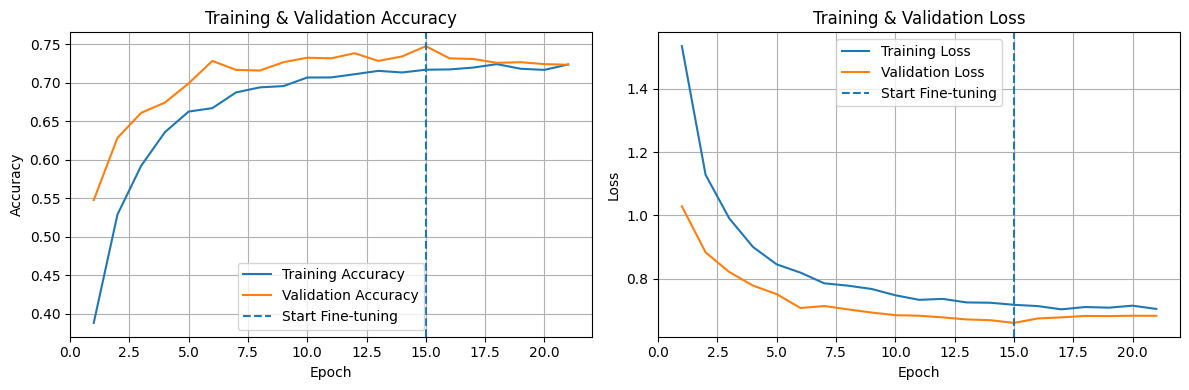

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history_head, history_ft):
    # Gabungkan history
    acc = history_head.history["accuracy"] + history_ft.history["accuracy"]
    val_acc = history_head.history["val_accuracy"] + history_ft.history["val_accuracy"]

    loss = history_head.history["loss"] + history_ft.history["loss"]
    val_loss = history_head.history["val_loss"] + history_ft.history["val_loss"]

    epochs_head = len(history_head.history["accuracy"])
    epochs_total = len(acc)

    plt.figure(figsize=(12, 4))

    # === Accuracy ===
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs_total + 1), acc, label="Training Accuracy")
    plt.plot(range(1, epochs_total + 1), val_acc, label="Validation Accuracy")
    plt.axvline(epochs_head, linestyle="--", label="Start Fine-tuning")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()
    plt.grid(True)

    # === Loss ===
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs_total + 1), loss, label="Training Loss")
    plt.plot(range(1, epochs_total + 1), val_loss, label="Validation Loss")
    plt.axvline(epochs_head, linestyle="--", label="Start Fine-tuning")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history_head, history_ft)

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.7879 - loss: 0.5914
Test loss: 0.6865
Test accuracy: 0.7375


In [ ]:
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
y_prob = model.predict(test_ds, verbose=1)  # shape (N, 4)
y_pred = np.argmax(y_prob, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step


<Figure size 600x600 with 0 Axes>

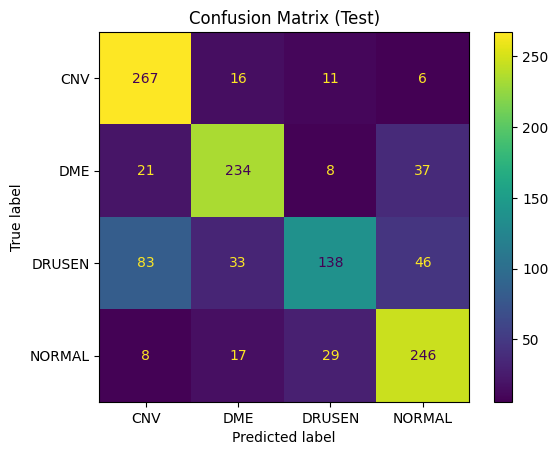

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']  # pastikan urutannya sama dg dataset

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(6,6))
disp.plot(values_format="d", cmap=None)  # tidak set warna manual
plt.title("Confusion Matrix (Test)")
plt.show()


In [ ]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[267  16  11   6]
 [ 21 234   8  37]
 [ 83  33 138  46]
 [  8  17  29 246]]


In [ ]:
metrics = []

for i, cls in enumerate(class_names):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    metrics.append({
        "Class": cls,
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "TN": TN
    })

df_confusion = pd.DataFrame(metrics)
df_confusion

Class   TP   FP   FN   TN
0     CNV  267  112   33  788
1     DME  234   66   66  834
2  DRUSEN  138   48  162  852
3  NORMAL  246   89   54  811

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


              precision    recall  f1-score   support

         CNV     0.7045    0.8900    0.7865       300
         DME     0.7800    0.7800    0.7800       300
      DRUSEN     0.7419    0.4600    0.5679       300
      NORMAL     0.7343    0.8200    0.7748       300

    accuracy                         0.7375      1200
   macro avg     0.7402    0.7375    0.7273      1200
weighted avg     0.7402    0.7375    0.7273      1200



In [ ]:
def safe_div(a, b):
    return a / b if b != 0 else 0.0

eval_metrics = []

for row in metrics:
    TP, FP, FN, TN = row["TP"], row["FP"], row["FN"], row["TN"]

    precision = safe_div(TP, TP + FP)
    recall = safe_div(TP, TP + FN)
    f1 = safe_div(2 * precision * recall, precision + recall)
    accuracy = safe_div(TP + TN, TP + TN + FP + FN)

    eval_metrics.append({
        "Class": row["Class"],
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

df_metrics = pd.DataFrame(eval_metrics)
df_metrics



Class  Accuracy  Precision  Recall  F1-Score
0     CNV  0.879167   0.704485    0.89  0.786451
1     DME  0.890000   0.780000    0.78  0.780000
2  DRUSEN  0.825000   0.741935    0.46  0.567901
3  NORMAL  0.880833   0.734328    0.82  0.774803

In [ ]:
macro_avg = df_metrics[["Accuracy", "Precision", "Recall", "F1-Score"]].mean()

print("Macro Average:")
print(macro_avg)

Macro Average:
Accuracy     0.868750
Precision    0.740187
Recall       0.737500
F1-Score     0.727289
dtype: float64


In [ ]:
from sklearn.metrics import roc_auc_score

# one-vs-rest AUC
y_true_oh = np.eye(len(class_names))[y_true]  # one-hot
auc_ovr = roc_auc_score(y_true_oh, y_prob, multi_class="ovr")
print(f"ROC-AUC (OvR): {auc_ovr:.4f}")

ROC-AUC (OvR): 0.9233


In [ ]:
model.save("deit_small_final.keras")
model.save_weights("deit_small_weights.weights.h5")


##### (opsional) simpan laporan

In [ ]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, labels=range(len(class_names)))
acc = accuracy_score(y_true, y_pred)

df = pd.DataFrame({
    "class": class_names,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "support": support
})

print(df)
print("accuracy:", acc)
df.to_csv("test_metrics_per_class.csv", index=False)
print("Saved: test_metrics_per_class.csv")


    class  precision  recall        f1  support
0     CNV   0.704485    0.89  0.786451      300
1     DME   0.780000    0.78  0.780000      300
2  DRUSEN   0.741935    0.46  0.567901      300
3  NORMAL   0.734328    0.82  0.774803      300
accuracy: 0.7375
Saved: test_metrics_per_class.csv


###inferensi

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import register_keras_serializable
from transformers import TFViTModel

@register_keras_serializable(package="Custom")
class ViTClassifier(keras.Model):
    def __init__(self, num_classes=4, dropout=0.4, backbone_name="facebook/deit-small-patch16-224", **kwargs):
        super().__init__(**kwargs)
        self.num_classes = num_classes
        self.dropout_rate = dropout
        self.backbone_name = backbone_name

        self.vit = TFViTModel.from_pretrained(
            backbone_name,
            from_pt=True,
            use_safetensors=False
        )
        self.drop = layers.Dropout(dropout)
        self.fc = layers.Dense(num_classes, activation="softmax")

    def call(self, x, training=False):
        x = tf.transpose(x, perm=[0, 3, 1, 2])  # NHWC -> NCHW
        out = self.vit(pixel_values=x, training=training)
        cls = out.last_hidden_state[:, 0, :]
        cls = self.drop(cls, training=training)
        return self.fc(cls)

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_classes": self.num_classes,
            "dropout": self.dropout_rate,
            "backbone_name": self.backbone_name,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [ ]:
model.save("vit_final.keras")

In [ ]:
loaded_model = keras.models.load_model(
    "vit_final.keras",
    custom_objects={"ViTClassifier": ViTClassifier}
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# simpan ulang versi yang rapi
loaded_model.save("vit_final_registered.keras")

In [ ]:
loaded_model2 = keras.models.load_model("vit_final_registered.keras")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np

class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

def vit_preprocess_image(image_path, img_size=224):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, (img_size, img_size))
    img = tf.cast(img, tf.float32) / 255.0
    img = (img - 0.5) / 0.5
    return tf.expand_dims(img, 0)

x = vit_preprocess_image("/content/dataset_split/test/CNV/CNV-7852568-109.jpeg")
probs = loaded_model.predict(x, verbose=0)[0]
pred = class_names[int(np.argmax(probs))]
print("Pred:", pred, "Conf:", float(np.max(probs)))


Pred: CNV Conf: 0.530776858329773


In [ ]:
d = vit_preprocess_image("/content/dataset_split/test/DRUSEN/DRUSEN-1117376-2.jpeg")
probs = loaded_model.predict(d, verbose=0)[0]
pred = class_names[int(np.argmax(probs))]
print("Pred:", pred, "Conf:", float(np.max(probs)))

Pred: DRUSEN Conf: 0.45087796449661255


In [ ]:
n = vit_preprocess_image("/content/dataset_split/test/NORMAL/NORMAL-138971-6.jpeg")
probs = loaded_model.predict(n, verbose=0)[0]
pred = class_names[int(np.argmax(probs))]
print("Pred:", pred, "Conf:", float(np.max(probs)))

Pred: NORMAL Conf: 0.4709493815898895


###pre install deit pre trained model req

In [ ]:
import transformers, safetensors, tensorflow as tf
print(transformers.__version__,"   ", safetensors.__version__,"  ", tf.__version__)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

4.43.3     0.4.5    2.19.0


In [ ]:
# !pip -q uninstall -y transformers safetensors huggingface_hub tokenizers
# !pip -q install "transformers==4.43.3" "safetensors==0.4.5" "huggingface_hub==0.24.6" "tokenizers==0.19.1"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 827.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.8/434.8 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 62.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
diffusers 0.36.0 requires huggingface-hub<2.0,>=0.34.0, but you have huggingface-hub 0.24.6 which is incompatible.
gradio 5.50.0 requires huggingface-hub<2.0,>=0.33.5, but you have huggingface-hub 0.24.6 which is incompatible.
peft 0.18.0 requires huggingface_hub>=0.25.0, but you have huggingface-hub 0.24.6 which is incompatible.


#New ViT dengan dataset jumbo dari 0

In [ ]:
import os, random, math
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

DATA_DIR = "/content/drive/MyDrive/TA_Dataset/extra"   # <-- ganti kalau path berbeda

IMG_SIZE = 224
BATCH_SIZE = 32

VAL_SPLIT = 0.15
TEST_SPLIT = 0.15
# total 30% untuk val+test. Kita buat split manual (train/val/test) lewat list file.

Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']

Jumlah per kelas:
CNV     : 5371
DME     : 5039
DRUSEN  : 5172
NORMAL  : 5048

Total: 20630


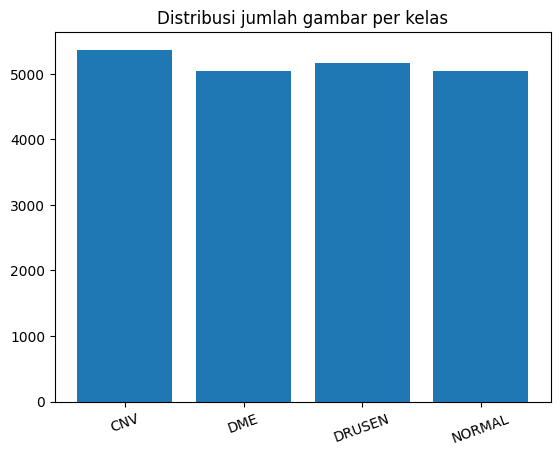

In [ ]:
class_names2 = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])
print("Classes:", class_names2)

counts = {}
all_files = []
valid_ext = ("jpg","jpeg","png","bmp","webp")

for c in class_names2:
    folder = os.path.join(DATA_DIR, c)
    files = [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith(valid_ext)]
    counts[c] = len(files)
    for fp in files:
        all_files.append((fp, c))

print("\nJumlah per kelas:")
for k, v in counts.items():
    print(f"{k:8s}: {v}")
print("\nTotal:", sum(counts.values()))

plt.figure()
plt.bar(counts.keys(), counts.values())
plt.title("Distribusi jumlah gambar per kelas")
plt.xticks(rotation=20)
plt.show()


In [ ]:
from pathlib import Path

DATA_DIR = Path("/content/drive/MyDrive/TA_Dataset/extra")  # sesuaikan

IMG_EXTS = {".jpg",".jpeg",".png",".bmp",".webp",".tif",".tiff"}

for c in sorted([p.name for p in DATA_DIR.iterdir() if p.is_dir()]):
    count = len([p for p in (DATA_DIR/c).rglob("*") if p.suffix.lower() in IMG_EXTS])
    print(c, count)

CNV 5371
DME 5039
DRUSEN 5172
NORMAL 5048


In [ ]:
from pathlib import Path

DATA_DIR = Path(DATA_DIR)

IMG_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".webp", ".tif", ".tiff"}

class_names = sorted([p.name for p in DATA_DIR.iterdir() if p.is_dir()])
print("Classes:", class_names)

counts = {}
samples = {}

for c in class_names:
    class_dir = DATA_DIR / c

    # rglob: ambil file gambar sampai subfolder terdalam
    files = [p for p in class_dir.rglob("*") if p.is_file() and p.suffix.lower() in IMG_EXTS]

    counts[c] = len(files)
    samples[c] = [str(p) for p in files[:5]]

print("\nJumlah gambar per kelas (rekursif):")
for k, v in counts.items():
    print(f"{k:8s}: {v}")

print("\nContoh path per kelas (untuk cek folder yang kebaca):")
for k in class_names:
    print(f"\n{k} samples:")
    for s in samples[k]:
        print("  ", s)

print("\nTotal images:", sum(counts.values()))


Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']

Jumlah gambar per kelas (rekursif):
CNV     : 5371
DME     : 5039
DRUSEN  : 5172
NORMAL  : 5048

Contoh path per kelas (untuk cek folder yang kebaca):

CNV samples:
   /content/drive/MyDrive/TA_Dataset/extra/CNV/CNV-9811594-88.jpeg
   /content/drive/MyDrive/TA_Dataset/extra/CNV/CNV-9811594-52.jpeg
   /content/drive/MyDrive/TA_Dataset/extra/CNV/CNV-9734808-78.jpeg
   /content/drive/MyDrive/TA_Dataset/extra/CNV/CNV-9811594-51.jpeg
   /content/drive/MyDrive/TA_Dataset/extra/CNV/CNV-9884539-2.jpeg

DME samples:
   /content/drive/MyDrive/TA_Dataset/extra/DME/DME-5912867-3.jpeg
   /content/drive/MyDrive/TA_Dataset/extra/DME/DME-5656004-33.jpeg
   /content/drive/MyDrive/TA_Dataset/extra/DME/DME-5922512-6.jpeg
   /content/drive/MyDrive/TA_Dataset/extra/DME/DME-5811118-1.jpeg
   /content/drive/MyDrive/TA_Dataset/extra/DME/DME-6406155-5.jpeg

DRUSEN samples:
   /content/drive/MyDrive/TA_Dataset/extra/DRUSEN/DRUSEN-9072701-15.jpeg
   /content/drive/MyD

In [ ]:
import random

MAX_PER_CLASS = 5000
SEED = 42
random.seed(SEED)

balanced_files = []

for c in class_names:
    files = [p for p in (DATA_DIR/c).rglob("*") if p.suffix.lower() in IMG_EXTS]
    random.shuffle(files)
    files = files[:MAX_PER_CLASS]
    balanced_files.extend([(str(p), c) for p in files])

print("Total setelah distandarkan:", len(balanced_files))


Total setelah distandarkan: 20000


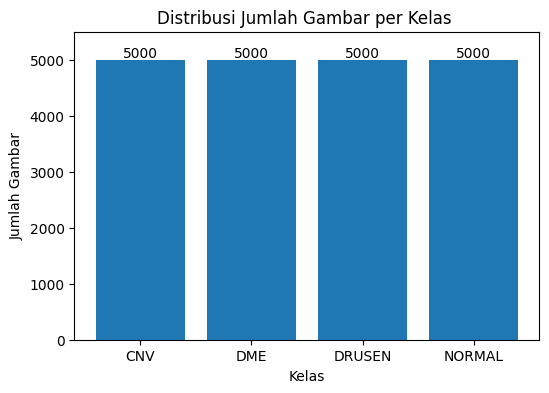

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

labels = [c for _, c in balanced_files]
count_per_class = Counter(labels)

plt.figure(figsize=(6,4))
plt.bar(count_per_class.keys(), count_per_class.values())
plt.title("Distribusi Jumlah Gambar per Kelas ")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.ylim(0, 5500)

for i, v in enumerate(count_per_class.values()):
    plt.text(i, v + 50, str(v), ha='center')

plt.show()


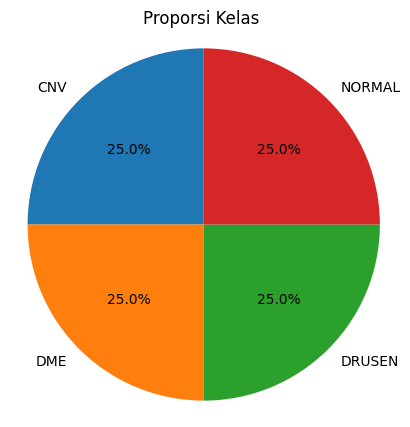

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(
    count_per_class.values(),
    labels=count_per_class.keys(),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Proporsi Kelas ")
plt.axis("equal")
plt.show()


In [ ]:
label_to_idx = {c:i for i,c in enumerate(class_names2)}
idx_to_label = {i:c for c,i in label_to_idx.items()}

by_class = {c:[] for c in class_names2}
for fp, c in all_files:
    by_class[c].append(fp)

train_list, val_list, test_list = [], [], []

for c in class_names2:
    files = by_class[c]
    random.shuffle(files)
    n = len(files)
    n_test = int(n * TEST_SPLIT)
    n_val  = int(n * VAL_SPLIT)

    test_files = files[:n_test]
    val_files  = files[n_test:n_test+n_val]
    train_files= files[n_test+n_val:]

    train_list += [(f, c) for f in train_files]
    val_list   += [(f, c) for f in val_files]
    test_list  += [(f, c) for f in test_files]

print("Train:", len(train_list), "Val:", len(val_list), "Test:", len(test_list))


Train: 14446 Val: 3092 Test: 3092


VIsualisasi tahapan 1 gambar

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = 224

augment_flip = tf.keras.layers.RandomFlip("horizontal")
augment_rotate = tf.keras.layers.RandomRotation(0.02)
augment_zoom = tf.keras.layers.RandomZoom(0.08)
augment_contrast = tf.keras.layers.RandomContrast(0.10)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def visualize_preprocessing_stages_vertical(image_path):
    # ===== Stage 1: Original =====
    orig = load_original(image_path)

    # ===== Stage 2: Resize =====
    resized = resize_224(orig)

    # ===== Stage 3: Normalize =====
    normalized = normalize_01(resized)

    # ===== Stage 4: Augmentations (step by step) =====
    aug_flip = augment_flip(normalized, training=True)
    aug_rotate = augment_rotate(normalized, training=True)
    aug_zoom = augment_zoom(normalized, training=True)
    aug_contrast = augment_contrast(normalized, training=True)

    # Convert for plotting
    def to_uint8(img):
        img = tf.clip_by_value(img, 0, 255)
        return tf.cast(img, tf.uint8).numpy()

    orig_np = to_uint8(orig)
    resized_np = to_uint8(resized)
    norm_np = tf.clip_by_value(normalized, 0.0, 1.0).numpy()

    aug_flip_np = tf.clip_by_value(aug_flip, 0.0, 1.0).numpy()
    aug_rotate_np = tf.clip_by_value(aug_rotate, 0.0, 1.0).numpy()
    aug_zoom_np = tf.clip_by_value(aug_zoom, 0.0, 1.0).numpy()
    aug_contrast_np = tf.clip_by_value(aug_contrast, 0.0, 1.0).numpy()

    # ===== Plot (1 kolom, ke bawah) =====
    plt.figure(figsize=(6, 20))

    stages = [
        (orig_np, f"Original\n{orig_np.shape[1]}×{orig_np.shape[0]}"),
        (resized_np, "Resize → 224×224"),
        (norm_np, f"Normalize → [0,1]\nmin={norm_np.min():.3f}, max={norm_np.max():.3f}"),
        (aug_flip_np, "Augmentation: Horizontal Flip"),
        (aug_rotate_np, "Augmentation: Small Rotation (±2%)"),
        (aug_zoom_np, "Augmentation: Zoom (±8%)"),
        (aug_contrast_np, "Augmentation: Contrast Adjustment (±10%)"),
    ]

    for i, (img, title) in enumerate(stages, start=1):
        plt.subplot(len(stages), 1, i)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


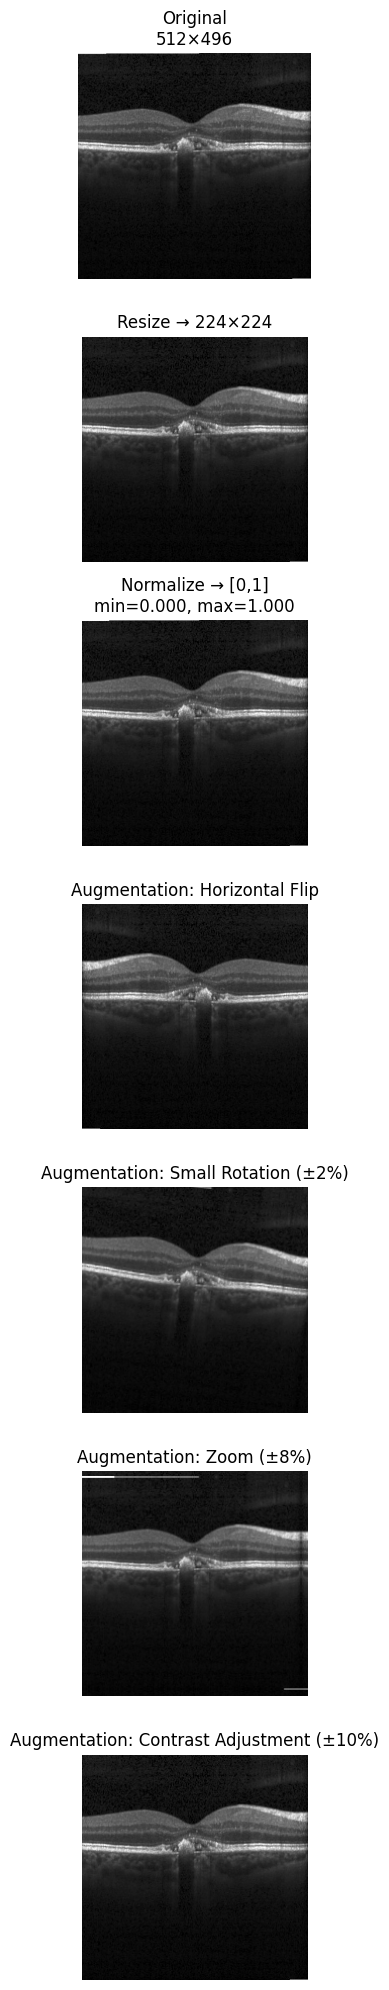

In [ ]:
sample_path = balanced_files[0][0]  # atau path lain
visualize_preprocessing_stages_vertical(sample_path)


####dataset real processing

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 224
BATCH_SIZE = 64  # kalau OOM -> 32
AUTOTUNE = tf.data.AUTOTUNE
SEED = 42

EPOCHS = 40

In [ ]:
data_augment = keras.Sequential([
    layers.RandomFlip("horizontal"),   # kalau ragu, matikan untuk eksperimen
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.08),
    layers.RandomContrast(0.10),
], name="augment")

def decode_resize_normalize(path, label):
    # Read bytes
    img = tf.io.read_file(path)
    # Decode (support jpg/png, dll)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    # Resize 224x224
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    # Normalize [0,1]
    img = tf.cast(img, tf.float32) / 255.0
    return img, label


In [ ]:
def make_tfdata(pairs, label_to_idx, training=False):
    paths = [p for p, _ in pairs]
    labels = [label_to_idx[c] for _, c in pairs]

    ds = tf.data.Dataset.from_tensor_slices((paths, labels))

    # Shuffle hanya untuk train
    if training:
        ds = ds.shuffle(4096, seed=SEED, reshuffle_each_iteration=True)

    # Preprocessing berlaku untuk seluruh ds (train/val/test)
    ds = ds.map(decode_resize_normalize, num_parallel_calls=AUTOTUNE)

    # Augment hanya untuk training
    if training:
        ds = ds.map(lambda x, y: (data_augment(x, training=True), y),
                    num_parallel_calls=AUTOTUNE)

    ds = ds.batch(BATCH_SIZE)

    # Cache val/test (lebih hemat dan stabil)
    if not training:
        ds = ds.cache()

    ds = ds.prefetch(AUTOTUNE)
    return ds


In [ ]:
train_ds = make_tfdata(train_list, label_to_idx, training=True)
val_ds   = make_tfdata(val_list, label_to_idx, training=False)
test_ds  = make_tfdata(test_list, label_to_idx, training=False)


In [ ]:
for images, labels in train_ds.take(1):
    print("Train batch shape:", images.shape)
    print("Train min:", tf.reduce_min(images).numpy())
    print("Train max:", tf.reduce_max(images).numpy())

for images, labels in val_ds.take(1):
    print("Val batch shape:", images.shape)
    print("Val min:", tf.reduce_min(images).numpy())
    print("Val max:", tf.reduce_max(images).numpy())


Train batch shape: (64, 224, 224, 3)
Train min: 0.0
Train max: 1.0733955
Val batch shape: (64, 224, 224, 3)
Val min: 0.0
Val max: 1.0


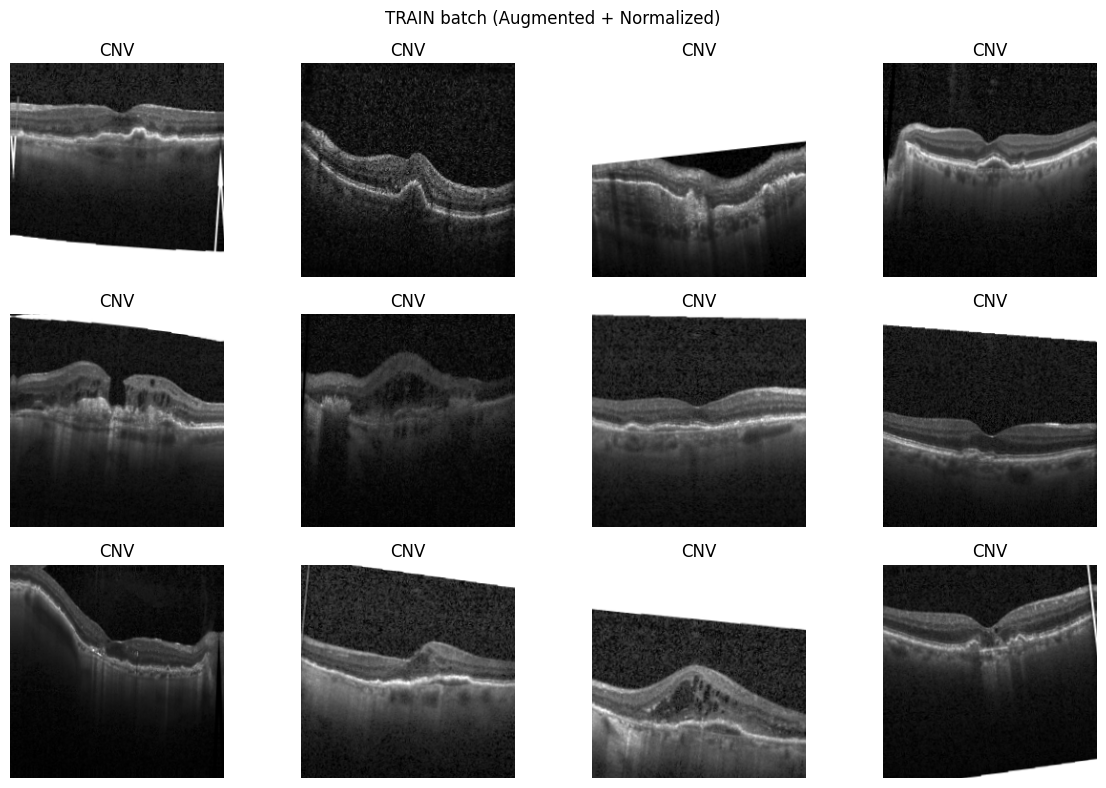

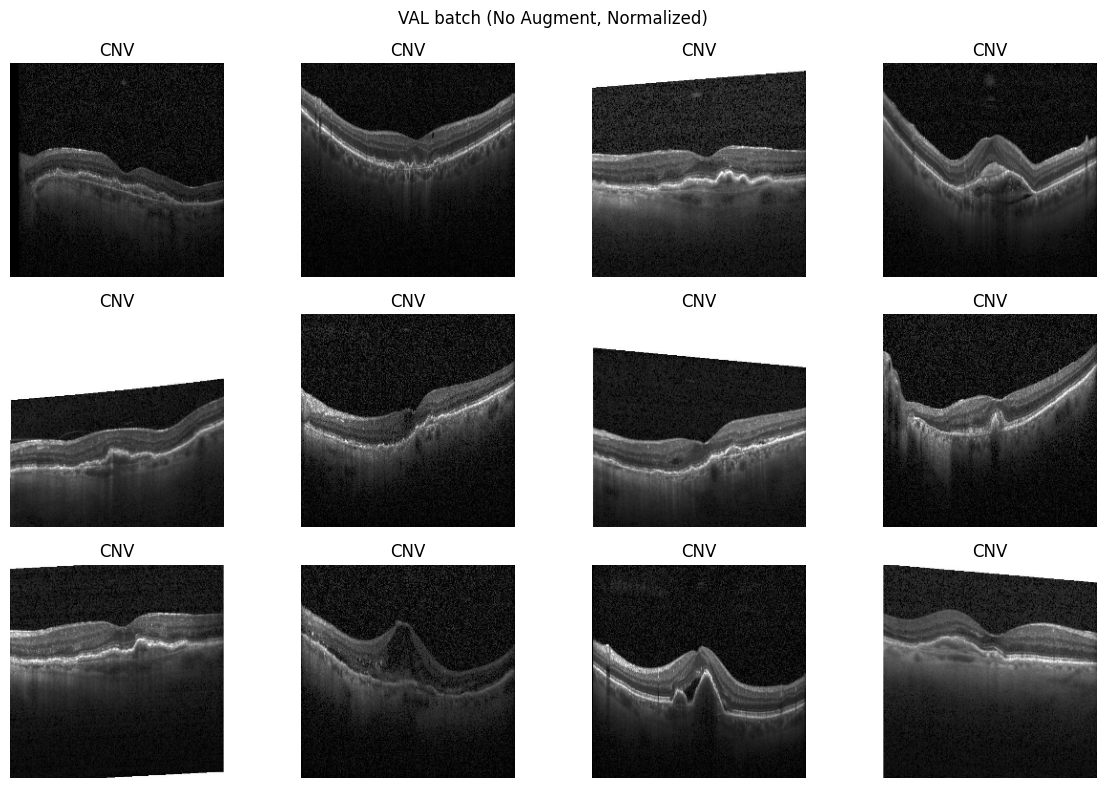

In [ ]:
def show_batch(ds, class_names, n=12, title="Batch"):
    plt.figure(figsize=(12, 8))
    for images, labels in ds.take(1):
        for i in range(min(n, images.shape[0])):
            plt.subplot(3, 4, i+1)
            plt.imshow(images[i].numpy())
            plt.title(class_names[int(labels[i])])
            plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_batch(train_ds, class_names, title="TRAIN batch (Augmented + Normalized)")
show_batch(val_ds, class_names, title="VAL batch (No Augment, Normalized)")


###buat model ViT

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        return tf.reshape(patches, [batch_size, -1, patch_dims])

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim):
        super().__init__()
        self.num_patches = num_patches
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(input_dim=num_patches, output_dim=embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        return self.proj(patches) + self.pos_emb(positions)

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

def build_vit_small(
    input_shape=(224,224,3),
    num_classes=4,
    patch_size=16,
    embed_dim=384,
    depth=12,
    num_heads=6,
    mlp_ratio=4,
    dropout=0.1
):
    inputs = keras.Input(shape=input_shape)

    patches = Patches(patch_size)(inputs)
    num_patches = (input_shape[0] // patch_size) * (input_shape[1] // patch_size)

    x = PatchEncoder(num_patches, embed_dim)(patches)
    x = layers.Dropout(dropout)(x)

    for _ in range(depth):
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attn = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim // num_heads,
            dropout=dropout
        )(x1, x1)
        x2 = layers.Add()([x, attn])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=[embed_dim*mlp_ratio, embed_dim], dropout_rate=dropout)
        x = layers.Add()([x2, x3])

    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)

    # output float32 supaya stabil di mixed precision
    outputs = layers.Dense(num_classes, activation="softmax", dtype="float32")(x)

    return keras.Model(inputs, outputs, name="vit_small_from_scratch")

model = build_vit_small(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    num_classes=len(class_names),
    patch_size=16,
    embed_dim=384,
    depth=12,
    num_heads=6,
    mlp_ratio=4,
    dropout=0.1
)

model.summary()


Model: "vit_small_from_scratch"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, None, 768) │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, 196, 384)  │    370,560 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 196, 384)  │          0 │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 196, 384)  │        768 │ dropout[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 196, 384)  │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 196, 384)  │          0 │ dropout[0][0],    │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 384)  │        768 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 196, 1536) │    591,360 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 196, 1536) │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 196, 384)  │    590,208 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 196, 384)  │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 196, 384)  │          0 │ add[0][0],        │
│                     │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 384)  │        768 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 196, 384)  │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 196, 384)  │          0 │ add_1[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 384)  │        768 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 196, 1536) │    591,360 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 196, 1536) │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 21,666,436 (82.65 MB)

 Trainable params: 21,666,436 (82.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
with open('model_summary.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

In [ ]:
steps_per_epoch = math.ceil(len(train_list) / BATCH_SIZE)
total_steps = steps_per_epoch * EPOCHS

lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=3e-4,  # kalau tidak stabil -> 1e-4
    decay_steps=total_steps,
    alpha=1e-2
)

optimizer = keras.optimizers.AdamW(
    learning_rate=lr_schedule,
    weight_decay=1e-4
)

# loss_fn = keras.losses.SparseCategoricalCrossentropy(label_smoothing=0.1)
loss_fn = keras.losses.SparseCategoricalCrossentropy(label_smoothing=0.5)
model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=["accuracy"]
)


TypeError: SparseCategoricalCrossentropy.__init__() got an unexpected keyword argument 'label_smoothing'

# New ViT 2

In [ ]:
import os
import random
from pathlib import Path
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import shutil
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###EDA

In [ ]:
DATASET_EDA_DIR = "/content/drive/MyDrive/dataset_TA/extra"

class_names = sorted([
    d for d in os.listdir(DATASET_EDA_DIR)
    if os.path.isdir(os.path.join(DATASET_EDA_DIR, d))
])

data_summary = []

for cls in class_names:
    cls_path = os.path.join(DATASET_EDA_DIR, cls)
    num_images = len([
        f for f in os.listdir(cls_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])
    data_summary.append({
        "Class": cls,
        "Number of Images": num_images
    })



df = pd.DataFrame(data_summary)
df


Class  Number of Images
0     CNV              6000
1     DME              6000
2  DRUSEN              6000
3  NORMAL              6000

In [ ]:
total_images = df["Number of Images"].sum()

print("Total images:", total_images)
print("Number of classes:", len(class_names))
print("Average images per class:", total_images // len(class_names))


Total images: 24000
Number of classes: 4
Average images per class: 6000


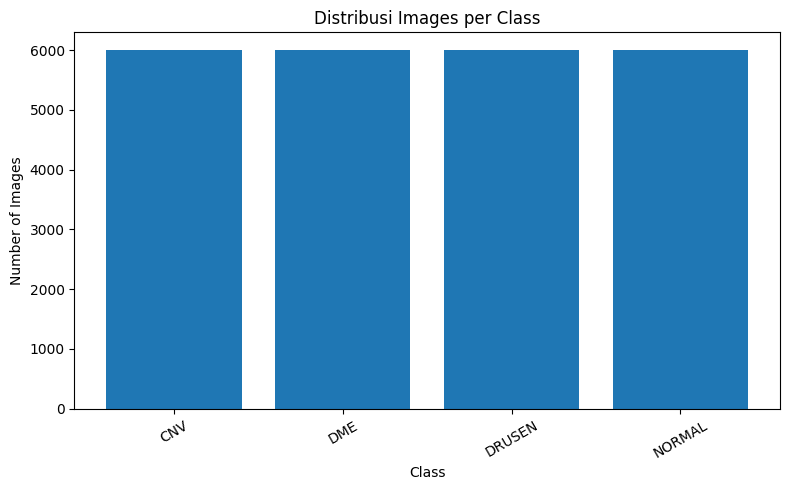

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df["Class"], df["Number of Images"])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Distribusi Images per Class")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


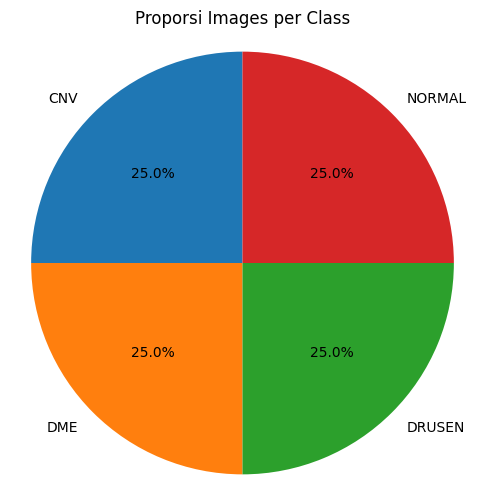

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(
    df["Number of Images"],
    labels=df["Class"],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Proporsi Images per Class")
plt.axis('equal')
plt.show()


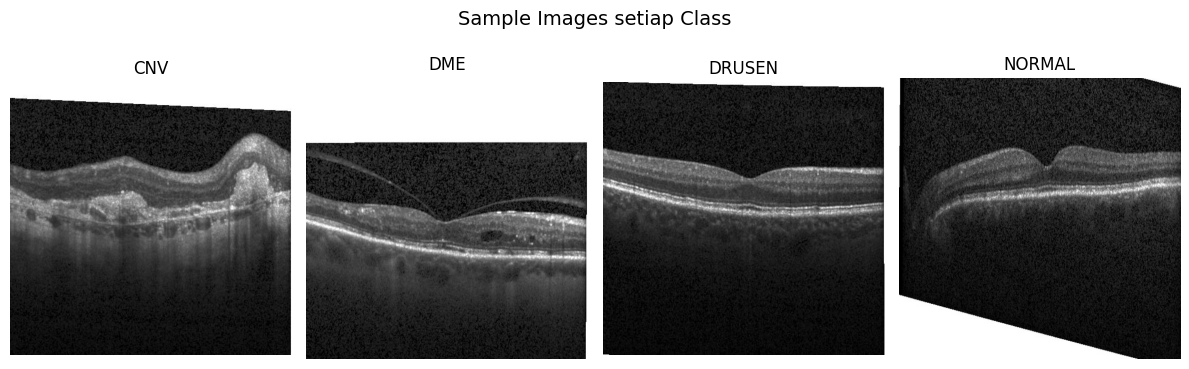

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(12,4))

for i, cls in enumerate(class_names):
    cls_path = os.path.join(DATASET_EDA_DIR, cls)
    img_files = [
        f for f in os.listdir(cls_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    img_name = random.choice(img_files)
    img_path = os.path.join(cls_path, img_name)
    img = Image.open(img_path).convert("RGB")

    plt.subplot(1, len(class_names), i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.suptitle("Sample Images setiap Class", fontsize=14)
plt.tight_layout()
plt.show()


##Versi DATA split 8:1:1

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
IMG_SIZE = 224

In [ ]:
RAW_DIR = Path("/content/drive/MyDrive/dataset_TA/extra")  # folder asli
SPLIT_DIR = Path("/content/dataset_split") # output split
IMG_EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp"}

class_names = sorted([d.name for d in RAW_DIR.iterdir() if d.is_dir()])
print("Classes:", class_names)

# (opsional) standarisasi max 6000/kelas
MAX_PER_CLASS = 6000

# rasio 8:1:1
TRAIN_RATIO, VAL_RATIO, TEST_RATIO = 0.8, 0.1, 0.1

def list_images(class_dir):
    files = [p for p in class_dir.rglob("*")
             if p.is_file() and p.suffix.lower() in IMG_EXTS]
    return files

def prepare_dirs():
    for split in ["train","val","test"]:
        for c in class_names:
            (SPLIT_DIR/split/c).mkdir(parents=True, exist_ok=True)

prepare_dirs()

for c in class_names:
    files = list_images(RAW_DIR/c)
    random.shuffle(files)

    if MAX_PER_CLASS is not None:
        files = files[:MAX_PER_CLASS]  # memastikan 6000/kelas

    n = len(files)
    n_train = int(TRAIN_RATIO * n)
    n_val   = int(VAL_RATIO * n)
    # sisanya test

    train_files = files[:n_train]
    val_files   = files[n_train:n_train+n_val]
    test_files  = files[n_train+n_val:]

    def copy_files(file_list, split_name):
        for p in file_list:
            dst = SPLIT_DIR/split_name/c/p.name
            shutil.copy2(p, dst)

    copy_files(train_files, "train")
    copy_files(val_files, "val")
    copy_files(test_files, "test")

    print(c, "-> Train:", len(train_files),' |val:', len(val_files)," |Test:", len(test_files))

print("Done split Ke:", SPLIT_DIR)

Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
CNV -> Train: 4800  |val: 600  |Test: 600
DME -> Train: 4800  |val: 600  |Test: 600
DRUSEN -> Train: 4800  |val: 600  |Test: 600
NORMAL -> Train: 4800  |val: 600  |Test: 600
Done split Ke: /content/dataset_split


###data preprocessing

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = 224
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

data_augment = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.08),
    layers.RandomContrast(0.10),
], name="augment")



In [ ]:
def load_ds(path, training=False):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        path,
        image_size=(IMG_SIZE, IMG_SIZE),#resize
        batch_size=BATCH_SIZE,
        shuffle=training
    )

    class_names = ds.class_names  #  ambil DI SINI

    ds = ds.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y), #normalisasi
                num_parallel_calls=AUTOTUNE)

    #augment training
    if training:
        ds = ds.map(lambda x,y: (data_augment(x, training=True), y),
                    num_parallel_calls=AUTOTUNE)

    if not training:
        ds = ds.cache()

    ds = ds.prefetch(AUTOTUNE)
    return ds, class_names


In [ ]:
train_ds, class_names = load_ds(SPLIT_DIR/"train", training=True)
val_ds, _ = load_ds(SPLIT_DIR/"val", training=False)
test_ds, _ = load_ds(SPLIT_DIR/"test", training=False)

print("class_names:", class_names)


Found 19200 files belonging to 4 classes.
Found 2400 files belonging to 4 classes.
Found 2400 files belonging to 4 classes.
class_names: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


#####Visualisasi preprosessing data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [ ]:
from tensorflow.keras import layers

aug_flip = layers.RandomFlip("horizontal")
aug_rotate = layers.RandomRotation(0.02)
aug_zoom = layers.RandomZoom(0.08)
aug_contrast = layers.RandomContrast(0.10)


In [ ]:
def visualisasi_preprocessing_dummy(image_path, img_size=224):
    # === Load original ===
    img = Image.open(image_path).convert("RGB")
    orig_np = np.array(img)

    # === Resize ===
    img_resized = img.resize((img_size, img_size))
    resized_np = np.array(img_resized)

    # === Normalize ===
    normalized = resized_np.astype("float32") / 255.0
    x = tf.expand_dims(normalized, axis=0)

    # === Apply augmentations one-by-one ===
    img_flip = aug_flip(x, training=True)[0].numpy()
    img_rot  = aug_rotate(x, training=True)[0].numpy()
    img_zoom = aug_zoom(x, training=True)[0].numpy()
    img_con  = aug_contrast(x, training=True)[0].numpy()

    # === Plot ===
    plt.figure(figsize=(6, 18))

    # 1. Original
    plt.subplot(6, 1, 1)
    plt.imshow(orig_np)
    plt.title(f"1. Original Image ({orig_np.shape[1]}×{orig_np.shape[0]})")
    plt.axis("off")

    # 2. Resized
    plt.subplot(6, 1, 2)
    plt.imshow(resized_np)
    plt.title("2. Resized Image (224×224)")
    plt.axis("off")

    # 3. Normalized
    plt.subplot(6, 1, 3)
    plt.imshow(normalized)
    plt.title("3. Normalized Image [0–1]")
    plt.axis("off")

    # 4. Flip
    plt.subplot(6, 1, 4)
    plt.imshow(np.clip(img_flip, 0, 1))
    plt.title("4. Augmented – Horizontal Flip")
    plt.axis("off")

    # 5. Rotation
    plt.subplot(6, 1, 5)
    plt.imshow(np.clip(img_rot, 0, 1))
    plt.title("5. Augmented – Random Rotation (±0.02)")
    plt.axis("off")

    # 6. Zoom
    plt.subplot(6, 1, 6)
    plt.imshow(np.clip(img_zoom, 0, 1))
    plt.title("6. Augmented – Random Zoom (±8%)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # === Contrast shown separately (optional) ===
    plt.figure(figsize=(4,4))
    plt.imshow(np.clip(img_con, 0, 1))
    plt.title("7. Augmented – Random Contrast (±10%)")
    plt.axis("off")
    plt.show()


In [ ]:
def visualisasi_preprocessing_dumm(image_path, img_size=224):
    # === Load original ===
    img = Image.open(image_path).convert("RGB")
    orig_np = np.array(img)

    # === Resize ===
    img_resized = img.resize((img_size, img_size))
    resized_np = np.array(img_resized)

    # === Normalize ===
    normalized = resized_np.astype("float32") / 255.0
    x = tf.expand_dims(normalized, axis=0)

    # === Apply augmentations one-by-one ===
    img_flip = aug_flip(x, training=True)[0].numpy()
    img_rot  = aug_rotate(x, training=True)[0].numpy()
    img_zoom = aug_zoom(x, training=True)[0].numpy()
    img_con  = aug_contrast(x, training=True)[0].numpy()

    # === Plot all in one figure (7 rows) ===
    plt.figure(figsize=(6, 20))

    plots = [
        (orig_np, f"Original Image ({orig_np.shape[1]}×{orig_np.shape[0]})"),
        (resized_np, "Resized Image (224×224)"),
        (normalized, "Normalized Image [0–1]"),
        (img_flip, "Augmented – Horizontal Flip"),
        (img_rot,  "Augmented – Random Rotation (±0.02)"),
        (img_zoom, "Augmented – Random Zoom (±8%)"),
        (img_con,  "Augmented – Random Contrast (±10%)"),
    ]

    for i, (im, title) in enumerate(plots, start=1):
        plt.subplot(7, 1, i)
        plt.imshow(np.clip(im, 0, 1) if im.dtype != np.uint8 else im)
        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

    # === Debug: cek beda numerik (biar kamu yakin ada perubahan) ===
    def mean_abs_diff(a, b):
        return float(np.mean(np.abs(a - b)))

    print("DEBUG mean(|aug - normalized|):")
    print("Flip     :", mean_abs_diff(img_flip, normalized))
    print("Rotation :", mean_abs_diff(img_rot, normalized))
    print("Zoom     :", mean_abs_diff(img_zoom, normalized))
    print("Contrast :", mean_abs_diff(img_con, normalized))


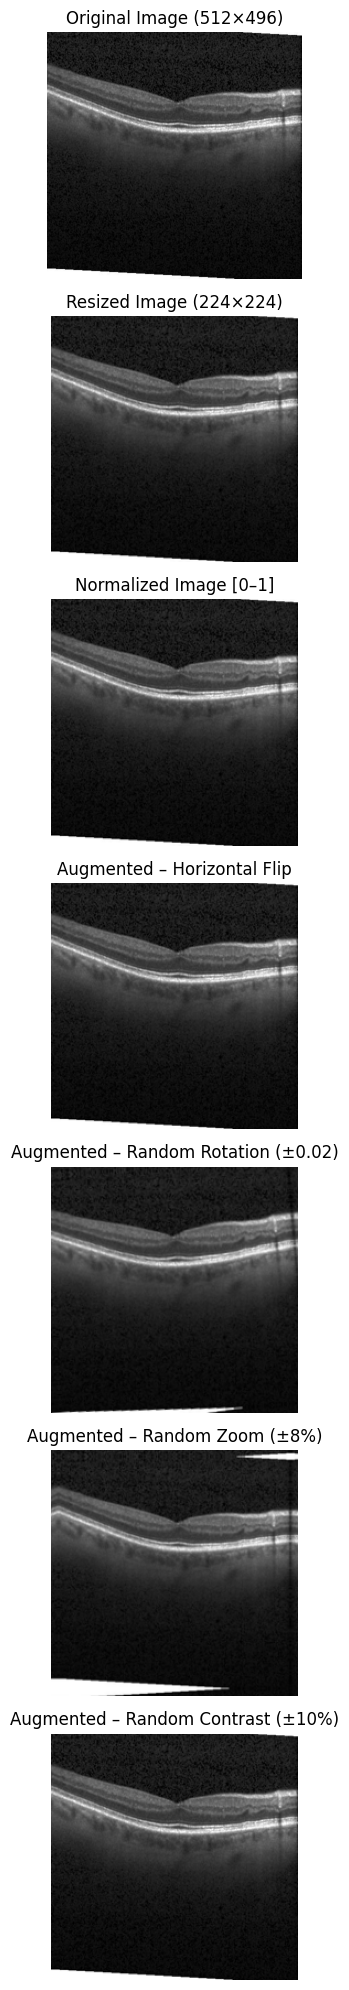

DEBUG mean(|aug - normalized|):
Flip     : 0.0
Rotation : 0.0663694366812706
Zoom     : 0.06139831617474556
Contrast : 0.002482440322637558


In [ ]:
visualisasi_preprocessing_dumm("/content/dataset_split/test/NORMAL/NORMAL-1015755-3.jpeg")


train min/max: 0.0 1.0798936


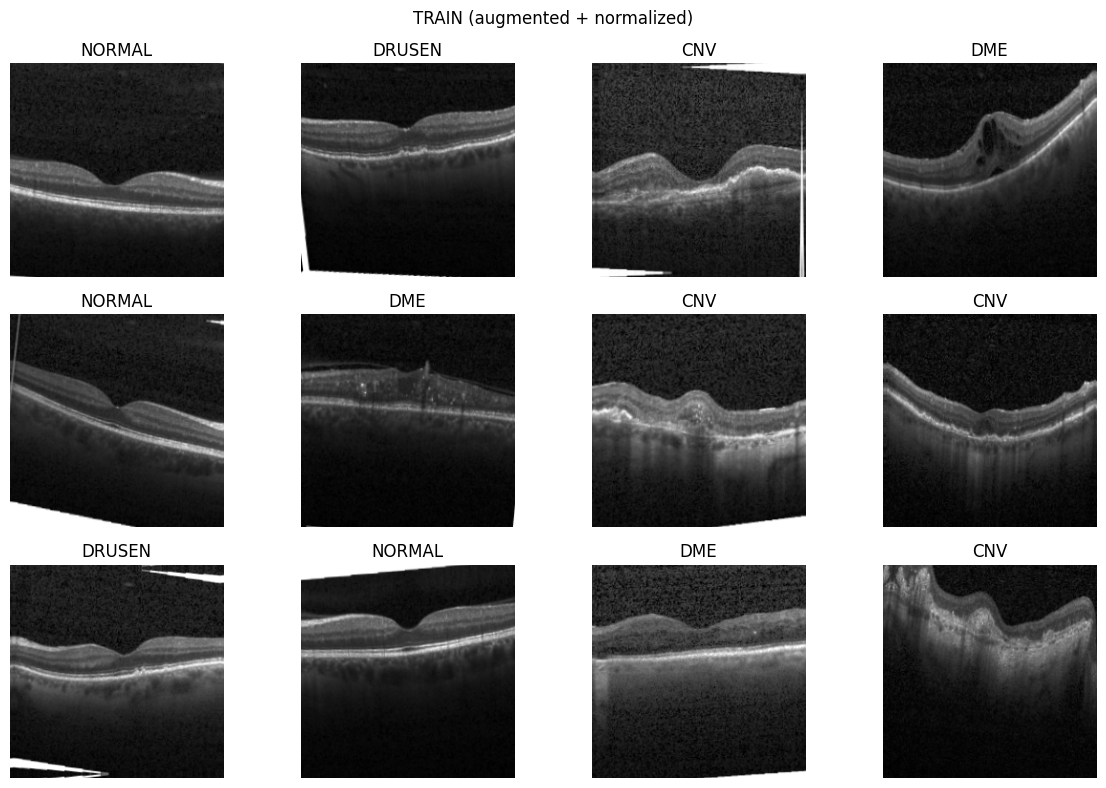

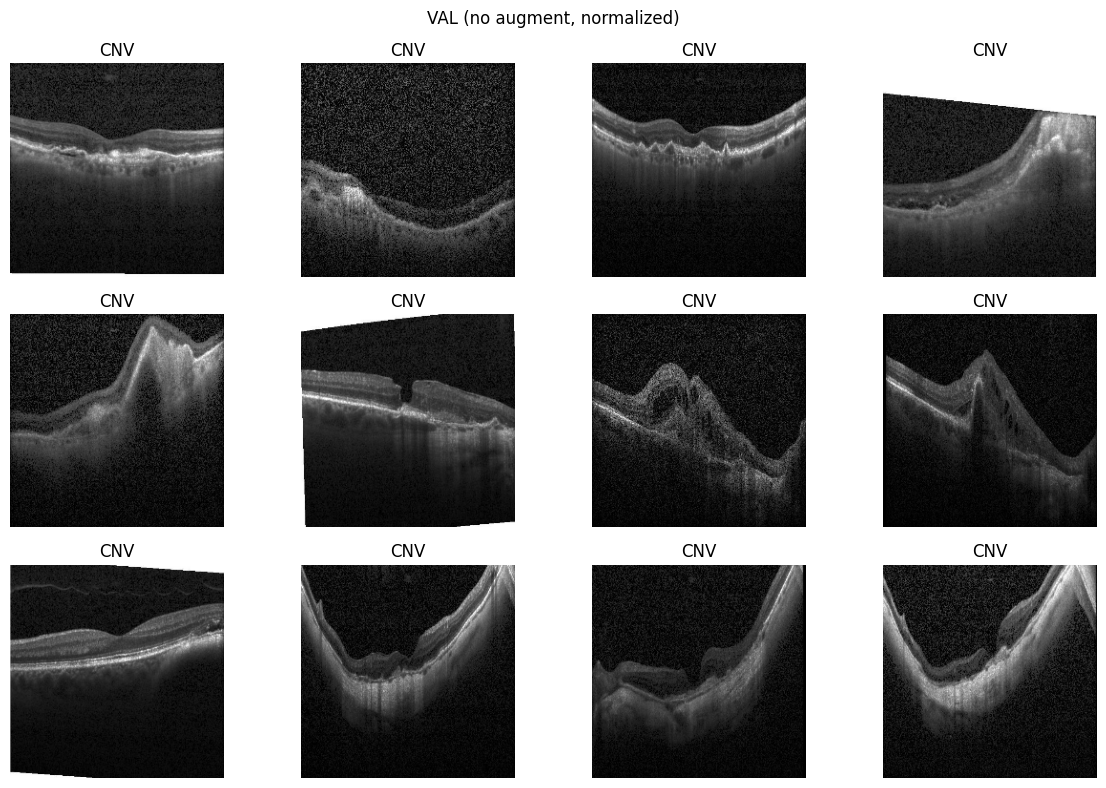

In [ ]:
for x,y in train_ds.take(1):
    print("train min/max:", tf.reduce_min(x).numpy(), tf.reduce_max(x).numpy())

import matplotlib.pyplot as plt
def show_batch(ds, title):
    plt.figure(figsize=(12,8))
    for x,y in ds.take(1):
        for i in range(12):
            plt.subplot(3,4,i+1)
            plt.imshow(x[i].numpy())
            plt.title(class_names[int(y[i])])
            plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_batch(train_ds, "TRAIN (augmented + normalized)")
show_batch(val_ds, "VAL (no augment, normalized)")


##### visualisasi Patching 16 dan 32

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def visualize_patch_grid_overlay(
    image_path,
    patch_size=16,
    img_size=224,
    grid_color="blue",
    line_width=0.8
):
    # Load & resize image
    img = Image.open(image_path).convert("RGB").resize((img_size, img_size))
    img_np = np.array(img)

    n = img_size // patch_size  # jumlah patch per sisi

    plt.figure(figsize=(6, 6))
    plt.imshow(img_np)
    plt.title(
        f"Patch size = {patch_size}×{patch_size} "
        f"({n}×{n} = {n*n} patches)"
    )
    plt.axis("off")

    # Draw vertical grid lines
    for i in range(1, n):
        x = i * patch_size
        plt.axvline(x=x, color=grid_color, linewidth=line_width)

    # Draw horizontal grid lines
    for i in range(1, n):
        y = i * patch_size
        plt.axhline(y=y, color=grid_color, linewidth=line_width)

    plt.show()


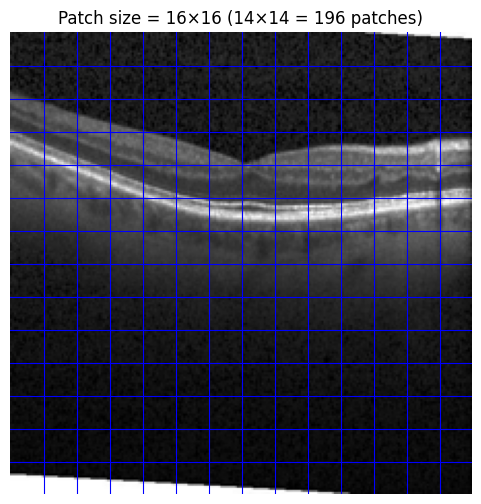

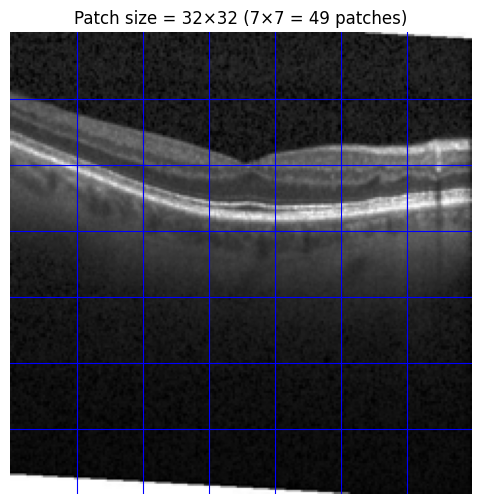

In [ ]:
image_path_try = "/content/dataset_split/test/NORMAL/NORMAL-1015755-3.jpeg"

# Patch size 16 → 14×14 grid (196 patch)
visualize_patch_grid_overlay(image_path_try, patch_size=16)

# Patch size 32 → 7×7 grid (49 patch)
visualize_patch_grid_overlay(image_path_try, patch_size=32)


### BUAT MODEL ViT-Small dari 0

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim):
        super().__init__()
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

def build_vit_small(
    input_shape=(224,224,3),
    num_classes=4,
    patch_size=32,
    embed_dim=384,
    depth=12,
    num_heads=6,
    mlp_ratio=4,
    dropout=0.1
):
    inputs = keras.Input(shape=input_shape)
    patches = Patches(patch_size)(inputs)
    num_patches = (input_shape[0] // patch_size) ** 2

    x = PatchEncoder(num_patches, embed_dim)(patches)
    x = layers.Dropout(dropout)(x)

    for _ in range(depth):
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attn = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim // num_heads,
            dropout=dropout
        )(x1, x1)
        x2 = layers.Add()([x, attn])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(embed_dim*mlp_ratio, activation=tf.nn.gelu)(x3)
        x3 = layers.Dropout(dropout)(x3)
        x3 = layers.Dense(embed_dim)(x3)
        x = layers.Add()([x2, x3])

    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs, name="vit_small")


In [ ]:
model = build_vit_small(num_classes=len(class_names))
model.summary()

Model: "vit_small"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, None,      │          0 │ input_layer_1[0]… │
│                     │ 3072)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, None, 384) │  1,198,848 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, None, 384) │          0 │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, None, 384) │        768 │ dropout[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None, 384) │          0 │ dropout[0][0],    │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, None,      │          0 │ dense_1[0][0]     │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, None, 384) │    590,208 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, None, 384) │          0 │ add[0][0],        │
│                     │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, None, 384) │          0 │ add_1[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 22,494,724 (85.81 MB)

 Trainable params: 22,494,724 (85.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import io

# Tangkap summary sebagai string
summary_string = io.StringIO()
model.summary(print_fn=lambda x: summary_string.write(x + '\n'))
summary_content = summary_string.getvalue()
summary_string.close()

# Simpan ke file
with open('model_summary_vit_small_32patch.txt', 'w') as f:
    f.write(summary_content)

In [ ]:
import tensorflow as tf
from tensorflow import keras

NUM_CLASSES = len(class_names)

def to_one_hot(images, labels):
    return images, tf.one_hot(labels, NUM_CLASSES)

train_ds_oh = train_ds.map(to_one_hot, num_parallel_calls=tf.data.AUTOTUNE)
val_ds_oh   = val_ds.map(to_one_hot,   num_parallel_calls=tf.data.AUTOTUNE)
test_ds_oh  = test_ds.map(to_one_hot,  num_parallel_calls=tf.data.AUTOTUNE)  # untuk evaluasi nanti

train_ds_oh = train_ds_oh.prefetch(tf.data.AUTOTUNE)
val_ds_oh   = val_ds_oh.prefetch(tf.data.AUTOTUNE)
test_ds_oh  = test_ds_oh.prefetch(tf.data.AUTOTUNE)


In [ ]:
for x, y in train_ds_oh.take(1):
    print("images:", x.shape)        # (batch, 224, 224, 3)
    print("labels:", y.shape)        # (batch, NUM_CLASSES)
    print("example label:", y[0].numpy())
    print("sum label:", tf.reduce_sum(y[0]).numpy())  # harus 1.0


images: (64, 224, 224, 3)
labels: (64, 4)
example label: [0. 0. 1. 0.]
sum label: 1.0


In [ ]:
EPOCHS = 50

steps_per_epoch = tf.data.experimental.cardinality(train_ds_oh).numpy()
if steps_per_epoch == tf.data.experimental.INFINITE_CARDINALITY:
    raise ValueError("Dataset cardinality infinite. Pastikan train_ds tidak di-repeat tanpa batas.")
if steps_per_epoch == tf.data.experimental.UNKNOWN_CARDINALITY:
    raise ValueError("Dataset cardinality unknown. Coba hilangkan cache/transform yang bikin unknown, atau set steps_per_epoch manual.")

total_steps = steps_per_epoch * EPOCHS

lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-4,
    decay_steps=total_steps,
    alpha=1e-2
)

optimizer = keras.optimizers.AdamW(
    learning_rate=lr_schedule,
    weight_decay=1e-4
)


In [ ]:
loss_fn = keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

In [ ]:
class SaveAtEpochs(keras.callbacks.Callback):
    def __init__(self, save_epochs, save_dir="epoch_checkpoints_V811"):
        super().__init__()
        self.save_epochs = set(save_epochs)   # {20, 40, 50}
        self.save_dir = save_dir
        os.makedirs(self.save_dir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        epoch_human = epoch + 1
        if epoch_human in self.save_epochs:
            path = os.path.join(
                self.save_dir,
                f"vit_epoch_{epoch_human:02d}.keras"
            )
            self.model.save(path)
            print(f"\n Saved checkpoint di epoch {epoch_human} -> {path}")


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=50,
        restore_best_weights=False,
        verbose=1
    ),
    SaveAtEpochs(
        save_epochs=[20, 40, 50],
        save_dir="epoch_checkpoints_V811"
    )
]

In [ ]:
model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=["accuracy"]
)


In [ ]:
history = model.fit(
    train_ds_oh,
    validation_data=val_ds_oh,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 354s 919ms/step - accuracy: 0.2493 - loss: 1.7668 - val_accuracy: 0.2571 - val_loss: 1.4100
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 234s 775ms/step - accuracy: 0.2613 - loss: 1.4341 - val_accuracy: 0.2663 - val_loss: 1.4015
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 229s 759ms/step - accuracy: 0.3229 - loss: 1.3761 - val_accuracy: 0.3913 - val_loss: 1.3180
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 228s 753ms/step - accuracy: 0.3781 - loss: 1.3162 - val_accuracy: 0.4363 - val_loss: 1.2422
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 262s 753ms/step - accuracy: 0.4400 - loss: 1.2517 - val_accuracy: 0.4392 - val_loss: 1.2632
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 234s 775ms/step - accuracy: 0.4738 - loss: 1.2105 - val_accuracy: 0.5079 - val_loss: 1.1831
Epoch 7/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 228s 754ms/step - accuracy: 0.5173 - loss: 1.1600 - val_accuracy: 0.5529 - val_loss: 1.1100
Epoch 8/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 227s 751ms/step - accuracy: 0.5392 -

In [ ]:
model.save("final_vit_model_32p_811.keras")


####evaluasi

In [ ]:
import numpy as np
import tensorflow as tf

def collect_preds(ds, model):
    y_true_list = []
    y_prob_list = []

    for x_batch, y_batch in ds:
        probs = model.predict(x_batch, verbose=0)
        y_prob_list.append(probs)

        yb = y_batch.numpy()
        # Jika y_batch one-hot -> ambil argmax, jika integer -> langsung
        if len(yb.shape) == 2:
            y_true_list.append(np.argmax(yb, axis=1))
        else:
            y_true_list.append(yb)

    y_true = np.concatenate(y_true_list, axis=0)
    y_prob = np.concatenate(y_prob_list, axis=0)
    y_pred = np.argmax(y_prob, axis=1)
    return y_true, y_pred, y_prob

In [ ]:
ds_for_eval = test_ds
#ds_for_eval = test_ds_oh

In [ ]:
y_true, y_pred, y_prob = collect_preds(ds_for_eval, model)
num_classes = len(class_names)

print("Total test samples:", len(y_true))
print("Num classes:", num_classes)


Total test samples: 2400
Num classes: 4


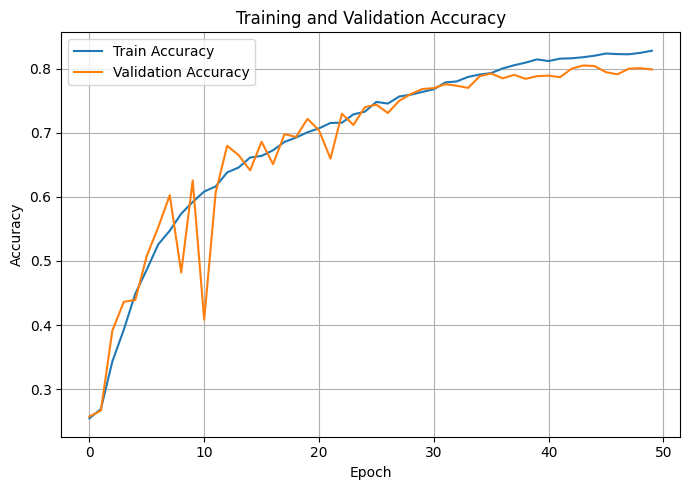

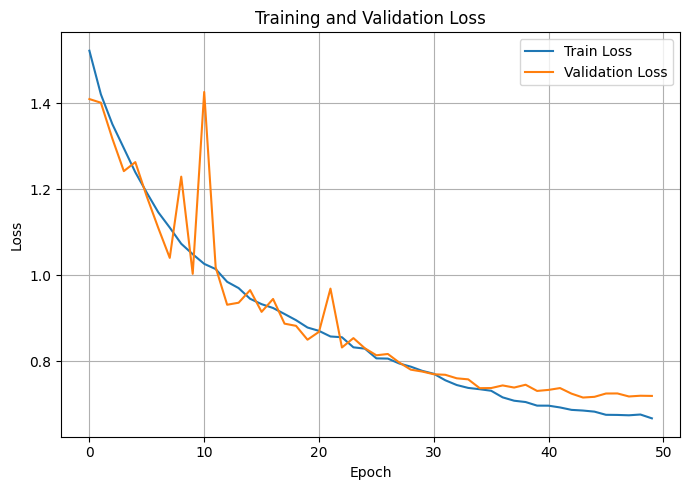

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(7,5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(7,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


confusion matrix

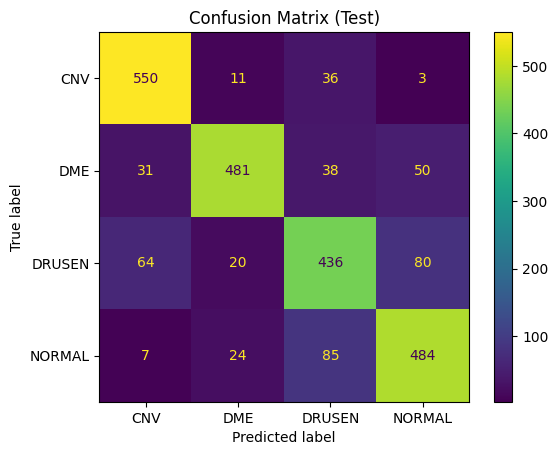


Classification Report:
              precision    recall  f1-score   support

         CNV     0.8436    0.9167    0.8786       600
         DME     0.8974    0.8017    0.8468       600
      DRUSEN     0.7328    0.7267    0.7297       600
      NORMAL     0.7844    0.8067    0.7954       600

    accuracy                         0.8129      2400
   macro avg     0.8145    0.8129    0.8126      2400
weighted avg     0.8145    0.8129    0.8126      2400



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format="d")
plt.title("Confusion Matrix (Test)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


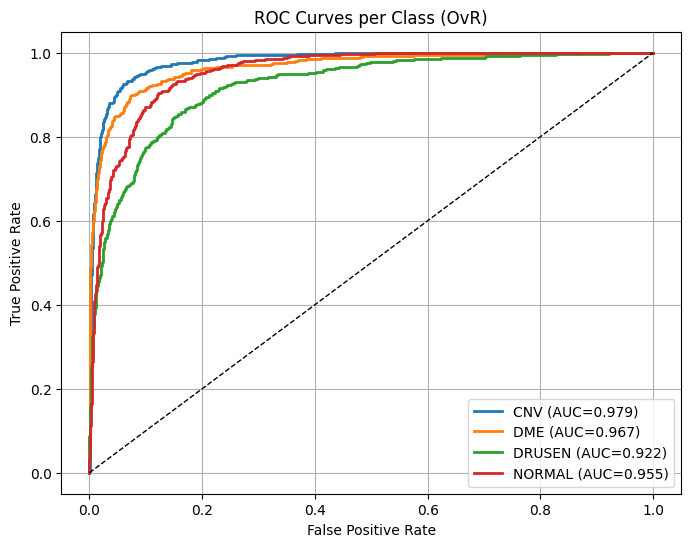


ROC–AUC per kelas:
- CNV: 0.9794
- DME: 0.9666
- DRUSEN: 0.9219
- NORMAL: 0.9548
Macro ROC–AUC: 0.9556541666666667


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{class_names[i]} (AUC={roc_auc[i]:.3f})")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Class (OvR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\nROC–AUC per kelas:")
for i in range(num_classes):
    print(f"- {class_names[i]}: {roc_auc[i]:.4f}")
print("Macro ROC–AUC:", float(np.mean(list(roc_auc.values()))))


In [ ]:
def sensitivity_specificity(cm, class_names):
    results = []
    total = cm.sum()
    num_classes = cm.shape[0]

    for i in range(num_classes):
        TP = cm[i, i]
        FN = cm[i, :].sum() - TP
        FP = cm[:, i].sum() - TP
        TN = total - (TP + FN + FP)

        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        results.append({
            "class": class_names[i],
            "Sensitivity": sensitivity,
            "Specificity": specificity
        })

    return results


In [ ]:
results = sensitivity_specificity(cm, class_names)

print("\nSensitivity & Specificity per kelas:")
for r in results:
    print(
        f"- {r['class']:10s} | "
        f"Sensitivity: {r['Sensitivity']:.4f} | "
        f"Specificity: {r['Specificity']:.4f}"
    )

# Macro average
macro_sens = np.mean([r["Sensitivity"] for r in results])
macro_spec = np.mean([r["Specificity"] for r in results])

print("\nMacro Average:")
print(f"Sensitivity (macro): {macro_sens:.4f}")
print(f"Specificity (macro): {macro_spec:.4f}")


Sensitivity & Specificity per kelas:
- CNV        | Sensitivity: 0.9167 | Specificity: 0.9433
- DME        | Sensitivity: 0.8017 | Specificity: 0.9694
- DRUSEN     | Sensitivity: 0.7267 | Specificity: 0.9117
- NORMAL     | Sensitivity: 0.8067 | Specificity: 0.9261

Macro Average:
Sensitivity (macro): 0.8129
Specificity (macro): 0.9376


inferensi

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.embed_dim = embed_dim
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "embed_dim": self.embed_dim
        })
        return config


In [ ]:
model = keras.models.load_model(
    "/content/final_vit_model_32p_811.keras",
    custom_objects={
        "Patches": Patches,
        "PatchEncoder": PatchEncoder
    },
    compile=False
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'patch_encoder_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [ ]:
import os

SPLIT_DIR = "/content/dataset_split"  # ganti sesuai path split kamu
class_names = sorted(os.listdir(f"{SPLIT_DIR}/train"))
print("class_names:", class_names)


class_names: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
import numpy as np
from PIL import Image

IMG_SIZE = 224

def predict_image(model, img_path, class_names, img_size=224):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((img_size, img_size))
    x = np.array(img).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)  # (1,224,224,3)

    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]

    return pred_label, probs


In [ ]:
img_path = "/content/dataset_split/test/NORMAL/NORMAL-1004480-3.jpeg"
label, probs = predict_image(model, img_path, class_names)

print("Predicted:", label)
print("Probabilities:")
for c, p in zip(class_names, probs):
    print(f"  {c:8s}: {p:.4f}")


Predicted: NORMAL
Probabilities:
  CNV     : 0.0232
  DME     : 0.0472
  DRUSEN  : 0.3323
  NORMAL  : 0.5974


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

IMG_SIZE = 224

# =========================
# Mapping rekomendasi terapi
# =========================
THERAPY_RECOMMENDATION = {
    "cnv": [
        "Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.",
        "Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.",
        "Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu."
    ],
    "dme": [
        "Anti-VEGF intravitreal merupakan terapi utama pada DME, khususnya untuk perbaikan fungsi penglihatan.",
        "Kortikosteroid intravitreal dapat dipertimbangkan pada DME persisten atau kurang respons terhadap anti-VEGF, dengan pemantauan risiko peningkatan tekanan intraokular dan katarak.",
        "Laser fotokoagulasi lebih sering berperan sebagai terapi adjuvan, bukan lini pertama.",
        "Vitrektomi dipertimbangkan pada kasus dengan indikasi bedah tertentu, seperti adanya komponen traksi vitreomakular.",
        "Kontrol faktor sistemik (glukosa darah, tekanan darah, dan lipid) merupakan bagian penting dari penatalaksanaan komprehensif."
    ],
    "drusen": [
        "Suplemen formula AREDS/AREDS2 direkomendasikan pada kondisi AMD tertentu, khususnya intermediate AMD atau drusen besar, untuk memperlambat progresi penyakit.",
        "Modifikasi gaya hidup dan pemantauan berkala diperlukan untuk mendeteksi progresi menuju AMD lanjut.",
        "Apabila berkembang menjadi AMD neovaskular dengan CNV, pendekatan terapi beralih ke anti-VEGF."
    ]
}


def predict_top1_with_therapy(model, img_path, class_names, img_size=224):
    # --- Preprocess ---
    img = Image.open(img_path).convert("RGB")
    img_resized = img.resize((img_size, img_size))
    x = np.array(img_resized).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)

    # --- Predict ---
    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]
    confidence = float(probs[pred_idx])

    # --- Tampilkan gambar ---
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {pred_label.upper()}\nConfidence: {confidence:.4f}")
    plt.show()

    # --- Rekomendasi terapi ---
    label_key = pred_label.lower()
    recommendations = THERAPY_RECOMMENDATION.get(label_key, [])

    print("=== HASIL INFERENSI MODEL ===")
    print(f"Kelas Prediksi : {pred_label.upper()}")
    print(f"Confidence     : {confidence:.4f}\n")

    print("=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")

    print("\nNote:")
    print("Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan secara keseluruhan penilaian klinis dokter mata.")

    return pred_label, confidence



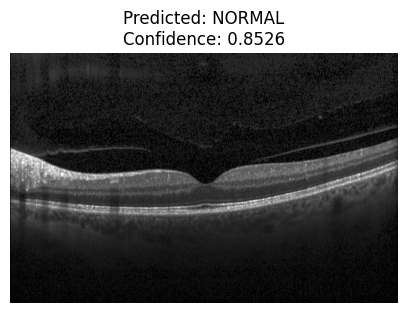

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : NORMAL
Confidence     : 0.8526

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===

Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


('NORMAL', 0.852633535861969)

In [ ]:
img_path = "/content/dataset_split/test/NORMAL/NORMAL-1058176-5.jpeg"
predict_top1_with_therapy(model, img_path, class_names)

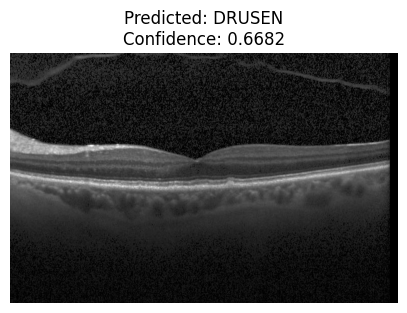

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : DRUSEN
Confidence     : 0.6682

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Suplemen formula AREDS/AREDS2 direkomendasikan pada kondisi AMD tertentu, khususnya intermediate AMD atau drusen besar, untuk memperlambat progresi penyakit.
2. Modifikasi gaya hidup dan pemantauan berkala diperlukan untuk mendeteksi progresi menuju AMD lanjut.
3. Apabila berkembang menjadi AMD neovaskular dengan CNV, pendekatan terapi beralih ke anti-VEGF.

Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


('DRUSEN', 0.668219804763794)

In [ ]:
img_path = "/content/dataset_split/test/DRUSEN/DRUSEN-1789270-23.jpeg"
predict_top1_with_therapy(model, img_path, class_names)

Saving CNV-7852568-133.jpeg to CNV-7852568-133 (1).jpeg


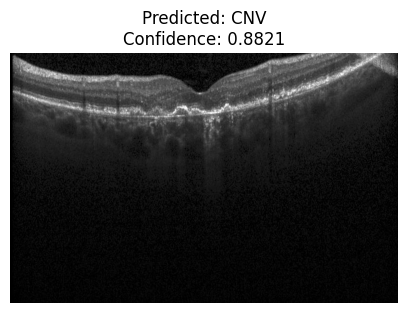

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : CNV
Confidence     : 0.8821

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.
2. Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.
3. Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu.

Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


In [ ]:
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

pred_label, conf = predict_top1_with_therapy(model, img_path, class_names)



##Versi DATA split 7 : 1 : 2

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
IMG_SIZE = 224

RAW_DIR = Path("/content/drive/MyDrive/dataset_TA/extra")  # folder asli
SPLIT_DIR = Path("/content/dataset_split") # output split
IMG_EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp"}

class_names = sorted([d.name for d in RAW_DIR.iterdir() if d.is_dir()])
print("Classes:", class_names)

# (opsional) standarisasi max 6000/kelas
MAX_PER_CLASS = 6000

# rasio 7:1:2
TRAIN_RATIO, VAL_RATIO, TEST_RATIO = 0.7, 0.1, 0.2

def list_images(class_dir):
    files = [p for p in class_dir.rglob("*")
             if p.is_file() and p.suffix.lower() in IMG_EXTS]
    return files

def prepare_dirs():
    for split in ["train","val","test"]:
        for c in class_names:
            (SPLIT_DIR/split/c).mkdir(parents=True, exist_ok=True)

prepare_dirs()

for c in class_names:
    files = list_images(RAW_DIR/c)
    random.shuffle(files)

    if MAX_PER_CLASS is not None:
        files = files[:MAX_PER_CLASS]  # memastikan 6000/kelas

    n = len(files)
    n_train = int(TRAIN_RATIO * n)
    n_val   = int(VAL_RATIO * n)
    # sisanya test

    train_files = files[:n_train]
    val_files   = files[n_train:n_train+n_val]
    test_files  = files[n_train+n_val:]

    def copy_files(file_list, split_name):
        for p in file_list:
            dst = SPLIT_DIR/split_name/c/p.name
            shutil.copy2(p, dst)

    copy_files(train_files, "train")
    copy_files(val_files, "val")
    copy_files(test_files, "test")

    print(c, "-> Train:", len(train_files),'|val:', len(val_files),"|Test:", len(test_files))

print("Done Data split Ke:", SPLIT_DIR)

Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
CNV -> Train: 4200 |val: 600 |Test: 1200
DME -> Train: 4200 |val: 600 |Test: 1200
DRUSEN -> Train: 4200 |val: 600 |Test: 1200
NORMAL -> Train: 4200 |val: 600 |Test: 1200
Done Data split Ke: /content/dataset_split


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = 224
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

data_augment = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.08),
    layers.RandomContrast(0.10),
], name="augment")

In [ ]:
def load_ds(path, training=False):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        path,
        image_size=(IMG_SIZE, IMG_SIZE),#resize
        batch_size=BATCH_SIZE,
        shuffle=training
    )

    class_names = ds.class_names  #  ambil DI SINI

    ds = ds.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y), #normalisasi
                num_parallel_calls=AUTOTUNE)

    #augment training
    if training:
        ds = ds.map(lambda x,y: (data_augment(x, training=True), y),
                    num_parallel_calls=AUTOTUNE)

    if not training:
        ds = ds.cache()

    ds = ds.prefetch(AUTOTUNE)
    return ds, class_names


In [ ]:
train_ds, class_names = load_ds(SPLIT_DIR/"train", training=True)
val_ds, _ = load_ds(SPLIT_DIR/"val", training=False)
test_ds, _ = load_ds(SPLIT_DIR/"test", training=False)

print("class_names:", class_names)

Found 16800 files belonging to 4 classes.
Found 2400 files belonging to 4 classes.
Found 4800 files belonging to 4 classes.
class_names: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim):
        super().__init__()
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

def build_vit_small(
    input_shape=(224,224,3),
    num_classes=4,
    patch_size=32,
    embed_dim=384,
    depth=12,
    num_heads=6,
    mlp_ratio=4,
    dropout=0.1
):
    inputs = keras.Input(shape=input_shape)
    patches = Patches(patch_size)(inputs)
    num_patches = (input_shape[0] // patch_size) ** 2

    x = PatchEncoder(num_patches, embed_dim)(patches)
    x = layers.Dropout(dropout)(x)

    for _ in range(depth):
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attn = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim // num_heads,
            dropout=dropout
        )(x1, x1)
        x2 = layers.Add()([x, attn])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(embed_dim*mlp_ratio, activation=tf.nn.gelu)(x3)
        x3 = layers.Dropout(dropout)(x3)
        x3 = layers.Dense(embed_dim)(x3)
        x = layers.Add()([x2, x3])

    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs, name="vit_small")


model = build_vit_small(num_classes=len(class_names))
model.summary()

Model: "vit_small"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, None,      │          0 │ input_layer_1[0]… │
│                     │ 3072)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, None, 384) │  1,198,848 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, None, 384) │          0 │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, None, 384) │        768 │ dropout[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None, 384) │          0 │ dropout[0][0],    │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, None,      │          0 │ dense_1[0][0]     │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, None, 384) │    590,208 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, None, 384) │          0 │ add[0][0],        │
│                     │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, None, 384) │          0 │ add_1[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 22,494,724 (85.81 MB)

 Trainable params: 22,494,724 (85.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
NUM_CLASSES = len(class_names)

def to_one_hot(images, labels):
    return images, tf.one_hot(labels, NUM_CLASSES)

train_ds_oh = train_ds.map(to_one_hot, num_parallel_calls=tf.data.AUTOTUNE)
val_ds_oh   = val_ds.map(to_one_hot,   num_parallel_calls=tf.data.AUTOTUNE)
test_ds_oh  = test_ds.map(to_one_hot,  num_parallel_calls=tf.data.AUTOTUNE)  # untuk evaluasi nanti

train_ds_oh = train_ds_oh.prefetch(tf.data.AUTOTUNE)
val_ds_oh   = val_ds_oh.prefetch(tf.data.AUTOTUNE)
test_ds_oh  = test_ds_oh.prefetch(tf.data.AUTOTUNE)


In [ ]:
EPOCHS = 50

steps_per_epoch = tf.data.experimental.cardinality(train_ds_oh).numpy()
if steps_per_epoch == tf.data.experimental.INFINITE_CARDINALITY:
    raise ValueError("Dataset cardinality infinite. Pastikan train_ds tidak di-repeat tanpa batas.")
if steps_per_epoch == tf.data.experimental.UNKNOWN_CARDINALITY:
    raise ValueError("Dataset cardinality unknown. Coba hilangkan cache/transform yang bikin unknown, atau set steps_per_epoch manual.")

total_steps = steps_per_epoch * EPOCHS

lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-4,
    decay_steps=total_steps,
    alpha=1e-2
)

optimizer = keras.optimizers.AdamW(
    learning_rate=lr_schedule,
    weight_decay=1e-4
)

loss_fn = keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

In [ ]:
class SaveAtEpochs(keras.callbacks.Callback):
    def __init__(self, save_epochs, save_dir="epoch_checkpoints_V712"):
        super().__init__()
        self.save_epochs = set(save_epochs)   # {20, 35, 50}
        self.save_dir = save_dir
        os.makedirs(self.save_dir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        epoch_human = epoch + 1
        if epoch_human in self.save_epochs:
            path = os.path.join(
                self.save_dir,
                f"vit_epoch_{epoch_human:02d}.keras"
            )
            self.model.save(path)
            print(f"\n Saved checkpoint di epoch {epoch_human} -> {path}")


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=50,
        restore_best_weights=False,
        verbose=1
    ),
    SaveAtEpochs(
        save_epochs=[20, 40, 50],
        save_dir="epoch_checkpoints_V712"
    )
]

In [ ]:
model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_ds_oh,
    validation_data=val_ds_oh,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 329s 962ms/step - accuracy: 0.2501 - loss: 1.8442 - val_accuracy: 0.2746 - val_loss: 1.3864
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 209s 788ms/step - accuracy: 0.2509 - loss: 1.4362 - val_accuracy: 0.2667 - val_loss: 1.3871
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 204s 772ms/step - accuracy: 0.2726 - loss: 1.4153 - val_accuracy: 0.3250 - val_loss: 1.3557
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 203s 767ms/step - accuracy: 0.2986 - loss: 1.3849 - val_accuracy: 0.3479 - val_loss: 1.3356
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 205s 774ms/step - accuracy: 0.3663 - loss: 1.3289 - val_accuracy: 0.4129 - val_loss: 1.2602
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 204s 772ms/step - accuracy: 0.4174 - loss: 1.2726 - val_accuracy: 0.4658 - val_loss: 1.2314
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 258s 753ms/step - accuracy: 0.4551 - loss: 1.2367 - val_accuracy: 0.4800 - val_loss: 1.1917
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 203s 765ms/step - accuracy: 0.4882 -

In [ ]:
model.save("final_vit_model_32p_712.keras")

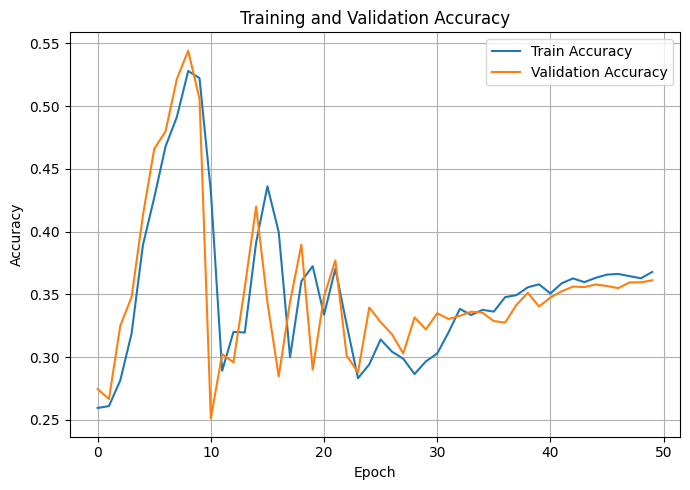

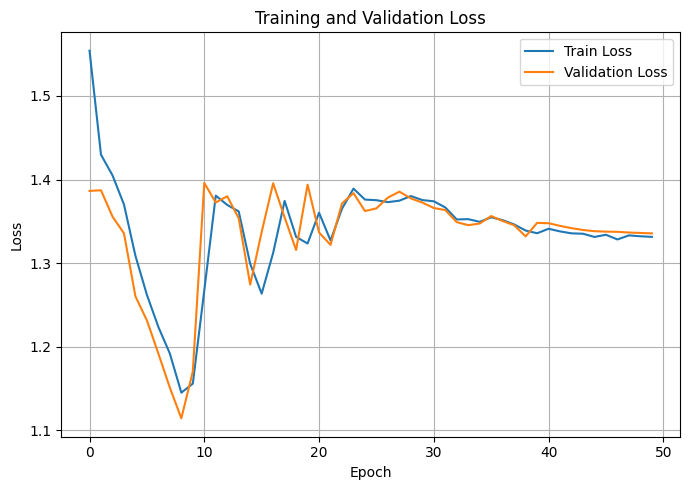

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(7,5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(7,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf

def collect_preds(ds, model):
    y_true_list = []
    y_prob_list = []

    for x_batch, y_batch in ds:
        probs = model.predict(x_batch, verbose=0)
        y_prob_list.append(probs)

        yb = y_batch.numpy()
        # Jika y_batch one-hot -> ambil argmax, jika integer -> langsung
        if len(yb.shape) == 2:
            y_true_list.append(np.argmax(yb, axis=1))
        else:
            y_true_list.append(yb)

    y_true = np.concatenate(y_true_list, axis=0)
    y_prob = np.concatenate(y_prob_list, axis=0)
    y_pred = np.argmax(y_prob, axis=1)
    return y_true, y_pred, y_prob

ds_for_eval = test_ds
#ds_for_eval = test_ds_oh

y_true, y_pred, y_prob = collect_preds(ds_for_eval, model)
num_classes = len(class_names)

print("Total test samples:", len(y_true))
print("Num classes:", num_classes)


Total test samples: 4800
Num classes: 4


confusion matrix

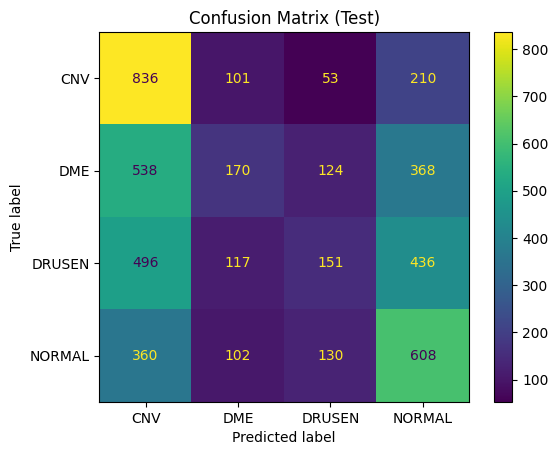


Classification Report:
              precision    recall  f1-score   support

         CNV     0.3749    0.6967    0.4875      1200
         DME     0.3469    0.1417    0.2012      1200
      DRUSEN     0.3297    0.1258    0.1821      1200
      NORMAL     0.3748    0.5067    0.4309      1200

    accuracy                         0.3677      4800
   macro avg     0.3566    0.3677    0.3254      4800
weighted avg     0.3566    0.3677    0.3254      4800



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format="d")
plt.title("Confusion Matrix (Test)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


Roc AUc

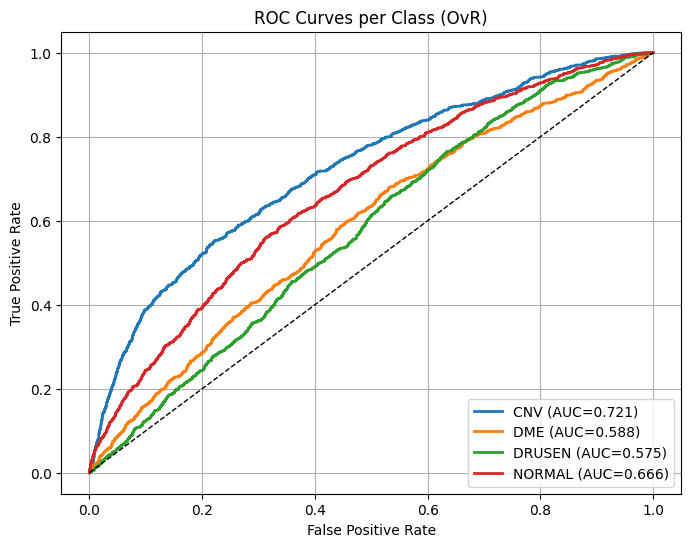


ROC–AUC per kelas:
- CNV: 0.7215
- DME: 0.5877
- DRUSEN: 0.5755
- NORMAL: 0.6662
Macro ROC–AUC: 0.6377030381944444


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{class_names[i]} (AUC={roc_auc[i]:.3f})")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Class (OvR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\nROC–AUC per kelas:")
for i in range(num_classes):
    print(f"- {class_names[i]}: {roc_auc[i]:.4f}")
print("Macro ROC–AUC:", float(np.mean(list(roc_auc.values()))))


In [ ]:
def sensitivity_specificity(cm, class_names):
    results = []
    total = cm.sum()
    num_classes = cm.shape[0]

    for i in range(num_classes):
        TP = cm[i, i]
        FN = cm[i, :].sum() - TP
        FP = cm[:, i].sum() - TP
        TN = total - (TP + FN + FP)

        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        results.append({
            "class": class_names[i],
            "Sensitivity": sensitivity,
            "Specificity": specificity
        })

    return results




In [ ]:
results = sensitivity_specificity(cm, class_names)

print("\nSensitivity & Specificity per kelas:")
for r in results:
    print(
        f"- {r['class']:10s} | "
        f"Sensitivity: {r['Sensitivity']:.4f} | "
        f"Specificity: {r['Specificity']:.4f}"
    )

# Macro average
macro_sens = np.mean([r["Sensitivity"] for r in results])
macro_spec = np.mean([r["Specificity"] for r in results])

print("\nMacro Average:")
print(f"Sensitivity (macro): {macro_sens:.4f}")
print(f"Specificity (macro): {macro_spec:.4f}")



Sensitivity & Specificity per kelas:
- CNV        | Sensitivity: 0.6967 | Specificity: 0.6128
- DME        | Sensitivity: 0.1417 | Specificity: 0.9111
- DRUSEN     | Sensitivity: 0.1258 | Specificity: 0.9147
- NORMAL     | Sensitivity: 0.5067 | Specificity: 0.7183

Macro Average:
Sensitivity (macro): 0.3677
Specificity (macro): 0.7892


inferensi

In [ ]:

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.embed_dim = embed_dim
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "embed_dim": self.embed_dim
        })
        return config


In [ ]:
modelload = keras.models.load_model(
    "/content/final_vit_model_32p_712.keras",
    custom_objects={
        "Patches": Patches,
        "PatchEncoder": PatchEncoder
    },
    compile=False
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'patch_encoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [ ]:
import os

SPLIT_DIR = "/content/dataset_split"  # ganti sesuai path split kamu
class_names = sorted(os.listdir(f"{SPLIT_DIR}/train"))
print("class_names:", class_names)

class_names: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
import numpy as np
from PIL import Image

IMG_SIZE = 224

def predict_image(model, img_path, class_names, img_size=224):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((img_size, img_size))
    x = np.array(img).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)  # (1,224,224,3)

    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]

    return pred_label, probs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

IMG_SIZE = 224

# =========================
# Mapping rekomendasi terapi
# =========================
THERAPY_RECOMMENDATION = {
    "cnv": [
        "Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.",
        "Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.",
        "Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu."
    ],
    "dme": [
        "Anti-VEGF intravitreal merupakan terapi utama pada DME, khususnya untuk perbaikan fungsi penglihatan.",
        "Kortikosteroid intravitreal dapat dipertimbangkan pada DME persisten atau kurang respons terhadap anti-VEGF, dengan pemantauan risiko peningkatan tekanan intraokular dan katarak.",
        "Laser fotokoagulasi lebih sering berperan sebagai terapi adjuvan, bukan lini pertama.",
        "Vitrektomi dipertimbangkan pada kasus dengan indikasi bedah tertentu, seperti adanya komponen traksi vitreomakular.",
        "Kontrol faktor sistemik (glukosa darah, tekanan darah, dan lipid) merupakan bagian penting dari penatalaksanaan komprehensif."
    ],
    "drusen": [
        "Suplemen formula AREDS/AREDS2 direkomendasikan pada kondisi AMD tertentu, khususnya intermediate AMD atau drusen besar, untuk memperlambat progresi penyakit.",
        "Modifikasi gaya hidup dan pemantauan berkala diperlukan untuk mendeteksi progresi menuju AMD lanjut.",
        "Apabila berkembang menjadi AMD neovaskular dengan CNV, pendekatan terapi beralih ke anti-VEGF."
    ]
}


def predict_top1_with_therapy(model, img_path, class_names, img_size=224):
    # --- Preprocess ---
    img = Image.open(img_path).convert("RGB")
    img_resized = img.resize((img_size, img_size))
    x = np.array(img_resized).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)

    # --- Predict ---
    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]
    confidence = float(probs[pred_idx])

    # --- Tampilkan gambar ---
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {pred_label.upper()}\nConfidence: {confidence:.4f}")
    plt.show()

    # --- Rekomendasi terapi ---
    label_key = pred_label.lower()
    recommendations = THERAPY_RECOMMENDATION.get(label_key, [])

    print("=== HASIL INFERENSI MODEL ===")
    print(f"Kelas Prediksi : {pred_label.upper()}")
    print(f"Confidence     : {confidence:.4f}\n")

    print("=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")

    print("\n⚠️ Note:")
    print("Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.")

    return pred_label, confidence



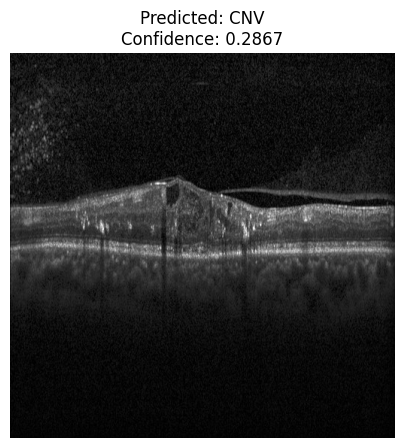

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : CNV
Confidence     : 0.2867

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.
2. Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.
3. Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu.

⚠️ Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


('CNV', 0.28668874502182007)

In [ ]:
img_path = "/content/dataset_split/test/DME/DME-3064922-198.jpeg"
predict_top1_with_therapy(modelload, img_path, class_names)

Saving DME-3064922-198.jpeg to DME-3064922-198.jpeg


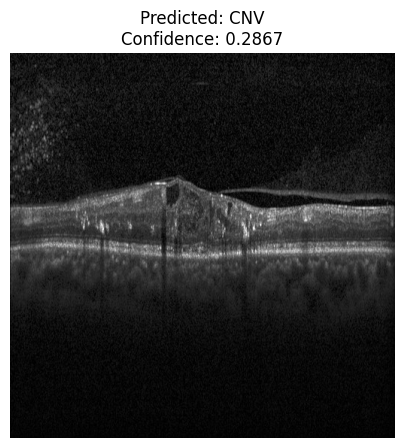

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : CNV
Confidence     : 0.2867

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.
2. Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.
3. Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu.

⚠️ Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


In [ ]:
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

pred_label, conf = predict_top1_with_therapy(modelload, img_path, class_names)


##Versi DATA split 7 : 1,5 : 1,5

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
IMG_SIZE = 224

In [ ]:
RAW_DIR = Path("/content/drive/MyDrive/dataset_TA/extra")  # folder asli
SPLIT_DIR = Path("/content/dataset_split") # output split
IMG_EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp"}

class_names = sorted([d.name for d in RAW_DIR.iterdir() if d.is_dir()])
print("Classes:", class_names)

# (opsional) standarisasi max 6000/kelas
MAX_PER_CLASS = 6000

# rasio 7:1,5:1,5
TRAIN_RATIO, VAL_RATIO, TEST_RATIO = 0.7, 0.15, 0.15

def list_images(class_dir):
    files = [p for p in class_dir.rglob("*")
             if p.is_file() and p.suffix.lower() in IMG_EXTS]
    return files

def prepare_dirs():
    for split in ["train","val","test"]:
        for c in class_names:
            (SPLIT_DIR/split/c).mkdir(parents=True, exist_ok=True)

prepare_dirs()

for c in class_names:
    files = list_images(RAW_DIR/c)
    random.shuffle(files)

    if MAX_PER_CLASS is not None:
        files = files[:MAX_PER_CLASS]  # memastikan 6000/kelas

    n = len(files)
    n_train = int(TRAIN_RATIO * n)
    n_val   = int(VAL_RATIO * n)
    # sisanya test

    train_files = files[:n_train]
    val_files   = files[n_train:n_train+n_val]
    test_files  = files[n_train+n_val:]

    def copy_files(file_list, split_name):
        for p in file_list:
            dst = SPLIT_DIR/split_name/c/p.name
            shutil.copy2(p, dst)

    copy_files(train_files, "train")
    copy_files(val_files, "val")
    copy_files(test_files, "test")

    print(c, "-> Train:", len(train_files),' |val:', len(val_files)," |Test:", len(test_files))

print("Done split into:", SPLIT_DIR)

Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
CNV -> Train: 4200  |val: 900  |Test: 900
DME -> Train: 4200  |val: 900  |Test: 900
DRUSEN -> Train: 4200  |val: 900  |Test: 900
NORMAL -> Train: 4200  |val: 900  |Test: 900
Done split into: /content/dataset_split


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = 224
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

data_augment = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.08),
    layers.RandomContrast(0.10),
], name="augment")

In [ ]:
def load_ds(path, training=False):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        path,
        image_size=(IMG_SIZE, IMG_SIZE),#resize
        batch_size=BATCH_SIZE,
        shuffle=training
    )

    class_names = ds.class_names  #  ambil DI SINI

    ds = ds.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y), #normalisasi
                num_parallel_calls=AUTOTUNE)

    #augment training
    if training:
        ds = ds.map(lambda x,y: (data_augment(x, training=True), y),
                    num_parallel_calls=AUTOTUNE)

    if not training:
        ds = ds.cache()

    ds = ds.prefetch(AUTOTUNE)
    return ds, class_names


In [ ]:
train_ds, class_names = load_ds(SPLIT_DIR/"train", training=True)
val_ds, _ = load_ds(SPLIT_DIR/"val", training=False)
test_ds, _ = load_ds(SPLIT_DIR/"test", training=False)

print("class_names:", class_names)

Found 16800 files belonging to 4 classes.
Found 3600 files belonging to 4 classes.
Found 3600 files belonging to 4 classes.
class_names: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim):
        super().__init__()
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

def build_vit_small(
    input_shape=(224,224,3),
    num_classes=4,
    patch_size=32,
    embed_dim=384,
    depth=12,
    num_heads=6,
    mlp_ratio=4,
    dropout=0.1
):
    inputs = keras.Input(shape=input_shape)
    patches = Patches(patch_size)(inputs)
    num_patches = (input_shape[0] // patch_size) ** 2

    x = PatchEncoder(num_patches, embed_dim)(patches)
    x = layers.Dropout(dropout)(x)

    for _ in range(depth):
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attn = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim // num_heads,
            dropout=dropout
        )(x1, x1)
        x2 = layers.Add()([x, attn])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(embed_dim*mlp_ratio, activation=tf.nn.gelu)(x3)
        x3 = layers.Dropout(dropout)(x3)
        x3 = layers.Dense(embed_dim)(x3)
        x = layers.Add()([x2, x3])

    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs, name="vit_small")


model = build_vit_small(num_classes=len(class_names))
model.summary()

Model: "vit_small"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, None,      │          0 │ input_layer_1[0]… │
│                     │ 3072)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, None, 384) │  1,198,848 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, None, 384) │          0 │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, None, 384) │        768 │ dropout[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None, 384) │          0 │ dropout[0][0],    │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, None,      │          0 │ dense_1[0][0]     │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, None, 384) │    590,208 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, None, 384) │          0 │ add[0][0],        │
│                     │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, None, 384) │          0 │ add_1[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 22,494,724 (85.81 MB)

 Trainable params: 22,494,724 (85.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
NUM_CLASSES = len(class_names)

def to_one_hot(images, labels):
    return images, tf.one_hot(labels, NUM_CLASSES)

train_ds_oh = train_ds.map(to_one_hot, num_parallel_calls=tf.data.AUTOTUNE)
val_ds_oh   = val_ds.map(to_one_hot,   num_parallel_calls=tf.data.AUTOTUNE)
test_ds_oh  = test_ds.map(to_one_hot,  num_parallel_calls=tf.data.AUTOTUNE)  # untuk evaluasi nanti

train_ds_oh = train_ds_oh.prefetch(tf.data.AUTOTUNE)
val_ds_oh   = val_ds_oh.prefetch(tf.data.AUTOTUNE)
test_ds_oh  = test_ds_oh.prefetch(tf.data.AUTOTUNE)


In [ ]:
EPOCHS = 50

steps_per_epoch = tf.data.experimental.cardinality(train_ds_oh).numpy()
if steps_per_epoch == tf.data.experimental.INFINITE_CARDINALITY:
    raise ValueError("Dataset cardinality infinite. Pastikan train_ds tidak di-repeat tanpa batas.")
if steps_per_epoch == tf.data.experimental.UNKNOWN_CARDINALITY:
    raise ValueError("Dataset cardinality unknown. Coba hilangkan cache/transform yang bikin unknown, atau set steps_per_epoch manual.")

total_steps = steps_per_epoch * EPOCHS

lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-4,
    decay_steps=total_steps,
    alpha=1e-2
)

optimizer = keras.optimizers.AdamW(
    learning_rate=lr_schedule,
    weight_decay=1e-4
)

loss_fn = keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

In [ ]:
class SaveAtEpochs(keras.callbacks.Callback):
    def __init__(self, save_epochs, save_dir="epoch_checkpoints_V71515"):
        super().__init__()
        self.save_epochs = set(save_epochs)   # {20, 40, 50}
        self.save_dir = save_dir
        os.makedirs(self.save_dir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        epoch_human = epoch + 1
        if epoch_human in self.save_epochs:
            path = os.path.join(
                self.save_dir,
                f"vit_32p_V71515_epoch_{epoch_human:02d}.keras"
            )
            self.model.save(path)
            print(f"\n Saved checkpoint di epoch {epoch_human} -> {path}")


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=40,
        restore_best_weights=False,
        verbose=1
    ),
    SaveAtEpochs(
        save_epochs=[20, 40, 50],
        save_dir="epoch_checkpoints_V71515"
    )
]

In [ ]:
model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=["accuracy"]
)

history = model.fit(
    train_ds_oh,
    validation_data=val_ds_oh,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 327s 948ms/step - accuracy: 0.2502 - loss: 1.8433 - val_accuracy: 0.2742 - val_loss: 1.3867
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 206s 780ms/step - accuracy: 0.2527 - loss: 1.4360 - val_accuracy: 0.2669 - val_loss: 1.3870
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 208s 788ms/step - accuracy: 0.2726 - loss: 1.4151 - val_accuracy: 0.3336 - val_loss: 1.3536
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 208s 786ms/step - accuracy: 0.2986 - loss: 1.3827 - val_accuracy: 0.3606 - val_loss: 1.3207
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 206s 777ms/step - accuracy: 0.3796 - loss: 1.3163 - val_accuracy: 0.4378 - val_loss: 1.2450
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 205s 774ms/step - accuracy: 0.4220 - loss: 1.2701 - val_accuracy: 0.4117 - val_loss: 1.2772
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 207s 780ms/step - accuracy: 0.4346 - loss: 1.2505 - val_accuracy: 0.4558 - val_loss: 1.2153
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 264s 791ms/step - accuracy: 0.4649 -

In [ ]:
model.save("final_vit_model_32p_71515.keras")

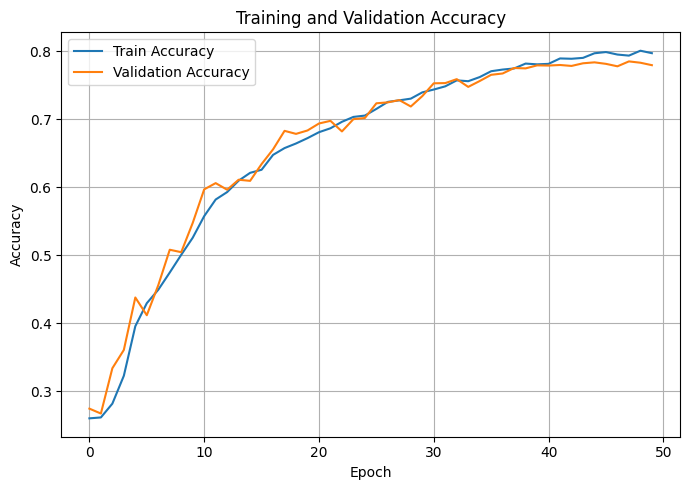

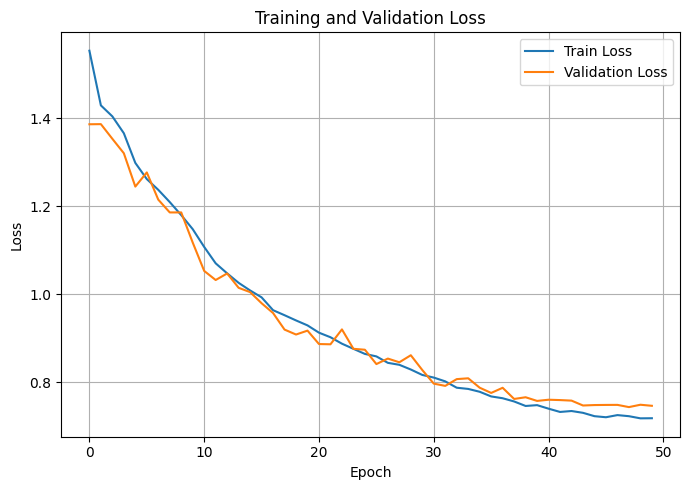

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(7,5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(7,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf

def collect_preds(ds, model):
    y_true_list = []
    y_prob_list = []

    for x_batch, y_batch in ds:
        probs = model.predict(x_batch, verbose=0)
        y_prob_list.append(probs)

        yb = y_batch.numpy()
        # Jika y_batch one-hot -> ambil argmax, jika integer -> langsung
        if len(yb.shape) == 2:
            y_true_list.append(np.argmax(yb, axis=1))
        else:
            y_true_list.append(yb)

    y_true = np.concatenate(y_true_list, axis=0)
    y_prob = np.concatenate(y_prob_list, axis=0)
    y_pred = np.argmax(y_prob, axis=1)
    return y_true, y_pred, y_prob

ds_for_eval = test_ds
#ds_for_eval = test_ds_oh

y_true, y_pred, y_prob = collect_preds(ds_for_eval, model)
num_classes = len(class_names)

print("Total test samples:", len(y_true))
print("Num classes:", num_classes)


Total test samples: 3600
Num classes: 4


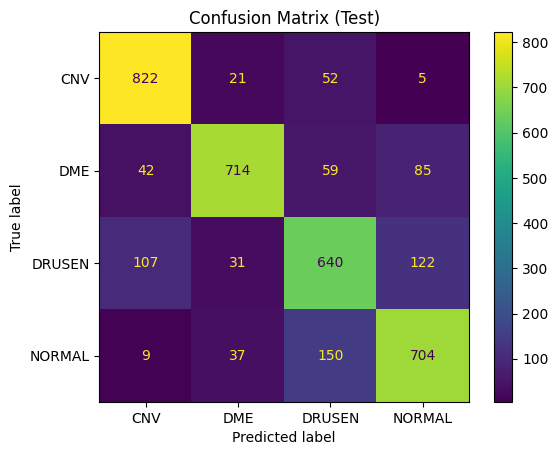


Classification Report:
              precision    recall  f1-score   support

         CNV     0.8388    0.9133    0.8745       900
         DME     0.8892    0.7933    0.8385       900
      DRUSEN     0.7103    0.7111    0.7107       900
      NORMAL     0.7686    0.7822    0.7753       900

    accuracy                         0.8000      3600
   macro avg     0.8017    0.8000    0.7998      3600
weighted avg     0.8017    0.8000    0.7998      3600



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format="d")
plt.title("Confusion Matrix (Test)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


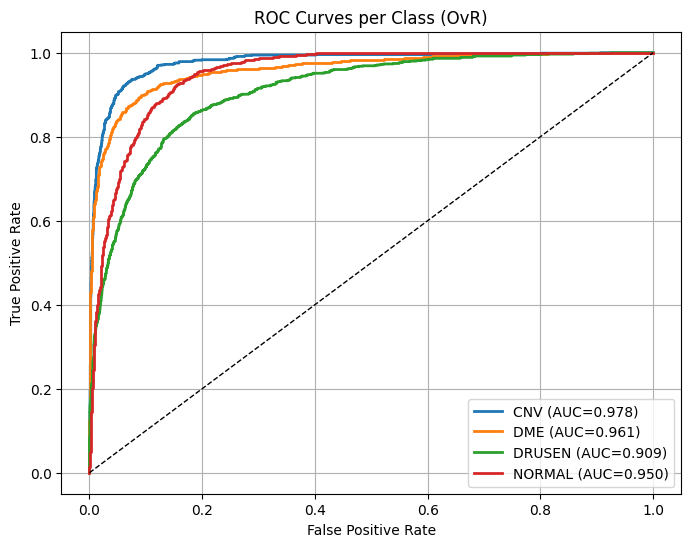


ROC–AUC per kelas:
- CNV: 0.9781
- DME: 0.9607
- DRUSEN: 0.9089
- NORMAL: 0.9499
Macro ROC–AUC: 0.9494073045267489


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{class_names[i]} (AUC={roc_auc[i]:.3f})")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Class (OvR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\nROC–AUC per kelas:")
for i in range(num_classes):
    print(f"- {class_names[i]}: {roc_auc[i]:.4f}")
print("Macro ROC–AUC:", float(np.mean(list(roc_auc.values()))))


In [ ]:
def sensitivity_specificity(cm, class_names):
    results = []
    total = cm.sum()
    num_classes = cm.shape[0]

    for i in range(num_classes):
        TP = cm[i, i]
        FN = cm[i, :].sum() - TP
        FP = cm[:, i].sum() - TP
        TN = total - (TP + FN + FP)

        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        results.append({
            "class": class_names[i],
            "Sensitivity": sensitivity,
            "Specificity": specificity
        })

    return results


In [ ]:
results = sensitivity_specificity(cm, class_names)

print("\nSensitivity & Specificity per kelas:")
for r in results:
    print(
        f"- {r['class']:10s} | "
        f"Sensitivity: {r['Sensitivity']:.4f} | "
        f"Specificity: {r['Specificity']:.4f}"
    )

# Macro average
macro_sens = np.mean([r["Sensitivity"] for r in results])
macro_spec = np.mean([r["Specificity"] for r in results])

print("\nMacro Average:")
print(f"Sensitivity (macro): {macro_sens:.4f}")
print(f"Specificity (macro): {macro_spec:.4f}")



Sensitivity & Specificity per kelas:
- CNV        | Sensitivity: 0.9133 | Specificity: 0.9415
- DME        | Sensitivity: 0.7933 | Specificity: 0.9670
- DRUSEN     | Sensitivity: 0.7111 | Specificity: 0.9033
- NORMAL     | Sensitivity: 0.7822 | Specificity: 0.9215

Macro Average:
Sensitivity (macro): 0.8000
Specificity (macro): 0.9333


inferensi

In [ ]:

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.embed_dim = embed_dim
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "embed_dim": self.embed_dim
        })
        return config


In [ ]:
modelload = keras.models.load_model(
    "/content/final_vit_model_32p_71515.keras",
    custom_objects={
        "Patches": Patches,
        "PatchEncoder": PatchEncoder
    },
    compile=False
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'patch_encoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [ ]:
import os

SPLIT_DIR = "/content/dataset_split"  # ganti sesuai path split kamu
class_names = sorted(os.listdir(f"{SPLIT_DIR}/train"))
print("class_names:", class_names)

In [ ]:
import numpy as np
from PIL import Image

IMG_SIZE = 224

def predict_image(model, img_path, class_names, img_size=224):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((img_size, img_size))
    x = np.array(img).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)  # (1,224,224,3)

    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]

    return pred_label, probs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

IMG_SIZE = 224

# =========================
# Mapping rekomendasi terapi
# =========================
THERAPY_RECOMMENDATION = {
    "cnv": [
        "Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.",
        "Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.",
        "Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu."
    ],
    "dme": [
        "Anti-VEGF intravitreal merupakan terapi utama pada DME, khususnya untuk perbaikan fungsi penglihatan.",
        "Kortikosteroid intravitreal dapat dipertimbangkan pada DME persisten atau kurang respons terhadap anti-VEGF, dengan pemantauan risiko peningkatan tekanan intraokular dan katarak.",
        "Laser fotokoagulasi lebih sering berperan sebagai terapi adjuvan, bukan lini pertama.",
        "Vitrektomi dipertimbangkan pada kasus dengan indikasi bedah tertentu, seperti adanya komponen traksi vitreomakular.",
        "Kontrol faktor sistemik (glukosa darah, tekanan darah, dan lipid) merupakan bagian penting dari penatalaksanaan komprehensif."
    ],
    "drusen": [
        "Suplemen formula AREDS/AREDS2 direkomendasikan pada kondisi AMD tertentu, khususnya intermediate AMD atau drusen besar, untuk memperlambat progresi penyakit.",
        "Modifikasi gaya hidup dan pemantauan berkala diperlukan untuk mendeteksi progresi menuju AMD lanjut.",
        "Apabila berkembang menjadi AMD neovaskular dengan CNV, pendekatan terapi beralih ke anti-VEGF."
    ]
}


def predict_top1_with_therapy(model, img_path, class_names, img_size=224):
    # --- Preprocess ---
    img = Image.open(img_path).convert("RGB")
    img_resized = img.resize((img_size, img_size))
    x = np.array(img_resized).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)

    # --- Predict ---
    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]
    confidence = float(probs[pred_idx])

    # --- Tampilkan gambar ---
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {pred_label.upper()}\nConfidence: {confidence:.4f}")
    plt.show()

    # --- Rekomendasi terapi ---
    label_key = pred_label.lower()
    recommendations = THERAPY_RECOMMENDATION.get(label_key, [])

    print("=== HASIL INFERENSI MODEL ===")
    print(f"Kelas Prediksi : {pred_label.upper()}")
    print(f"Confidence     : {confidence:.4f}\n")

    print("=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")

    print("\n Note:")
    print("Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.")

    return pred_label, confidence



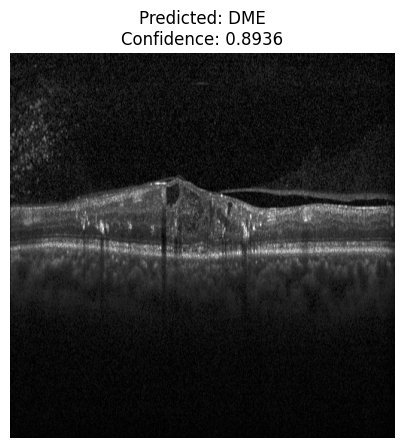

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : DME
Confidence     : 0.8936

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Anti-VEGF intravitreal merupakan terapi utama pada DME, khususnya untuk perbaikan fungsi penglihatan.
2. Kortikosteroid intravitreal dapat dipertimbangkan pada DME persisten atau kurang respons terhadap anti-VEGF, dengan pemantauan risiko peningkatan tekanan intraokular dan katarak.
3. Laser fotokoagulasi lebih sering berperan sebagai terapi adjuvan, bukan lini pertama.
4. Vitrektomi dipertimbangkan pada kasus dengan indikasi bedah tertentu, seperti adanya komponen traksi vitreomakular.
5. Kontrol faktor sistemik (glukosa darah, tekanan darah, dan lipid) merupakan bagian penting dari penatalaksanaan komprehensif.

 Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


('DME', 0.8935539722442627)

In [ ]:
img_path = "/content/dataset_split/test/DME/DME-3064922-198.jpeg"
predict_top1_with_therapy(modelload, img_path, class_names)

Saving CNV-7852568-133.jpeg to CNV-7852568-133.jpeg


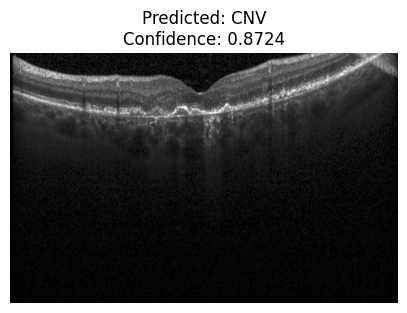

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : CNV
Confidence     : 0.8724

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.
2. Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.
3. Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu.

 Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


In [ ]:
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

pred_label, conf = predict_top1_with_therapy(modelload, img_path, class_names)